In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("./data/repruni10pc137.csv")
id_map = {
    0: "Belazzougui et al.",
    1: "LPF pruned s=1 DP",
    2: "LPF pruned s=1",
    3: "LPF pruned s=1 no cut",
    4: "LPF pruned s=z DP",
    5: "LPF pruned s=z",
    6: "LPF s=z",
    7: "LPF s=1",
    8: "LPF heuristic s=z",
    9: "FP pruned s=1",
    10: "FP pruned s=z",
    11: "FP s=z",
    12: "FP s=1",
    13: "wavelet tree",
}
col_wrapping = 3
df['name'] = df["id"].replace(id_map)
df['text_id'] = df["text_id"].replace({"/workspace/dmeyer/data/" : ""}, regex=True)
df['bpS'] = df.apply(lambda row: row.treesize/ row.textsize * 8 , axis=1)
df['bpSrs'] = df.apply(lambda row: row.treesize_rs/ row.textsize * 8 , axis=1)
id = df['name'].unique()
pal = dict(zip(id, sns.color_palette("Dark2", n_colors=len(id))))
dfmarkers = dict(zip(id,['o','v','^','<', '>', '8','s','p','*','h'] ))
print(df.head())
theodict = [0,11,12,6,7]
theoonly = df[(df.id == 0) |(df.id == 11) | (df.id == 12) | (df.id == 6) | (df.id == 7)]
nowave = df[(df.id != 13)]
pruned = df[(df.id == 0) | (df.id == 1) |(df.id == 2) |(df.id == 3) |(df.id == 4) |(df.id == 5) |(df.id == 9)|(df.id == 8)  |(df.id == 10)]

   id        text_id  textsize  treesize  constr_time    peak_mem  access_avg  \
0  13  world_leaders  46968181         0          911           0    818.2090   
1  13  world_leaders  46968181         0          907           0    881.0610   
2   8  world_leaders  46968181  10988385         5336  1127236344     70.2088   
3   1  world_leaders  46968181  10978784         5863  1127236344     89.5601   
4   4  world_leaders  46968181  10980845         5519  1127236344     69.6814   

   constr_time_rs  treesize_rs  rank_avg  select_avg  s   t   l  \
0             911            0   723.662    1370.430  1   1   0   
1             907            0   679.038    1383.570  1   2   0   
2            8096     28347309   149.237     567.693  1  16  16   
3            8592     27676150   169.025     542.034  1  16  16   
4            8235     28423737   150.567     560.523  1  16  16   

           result               name       bpS     bpSrs  
0  25036252518864       wavelet tree  0.000000  0.0

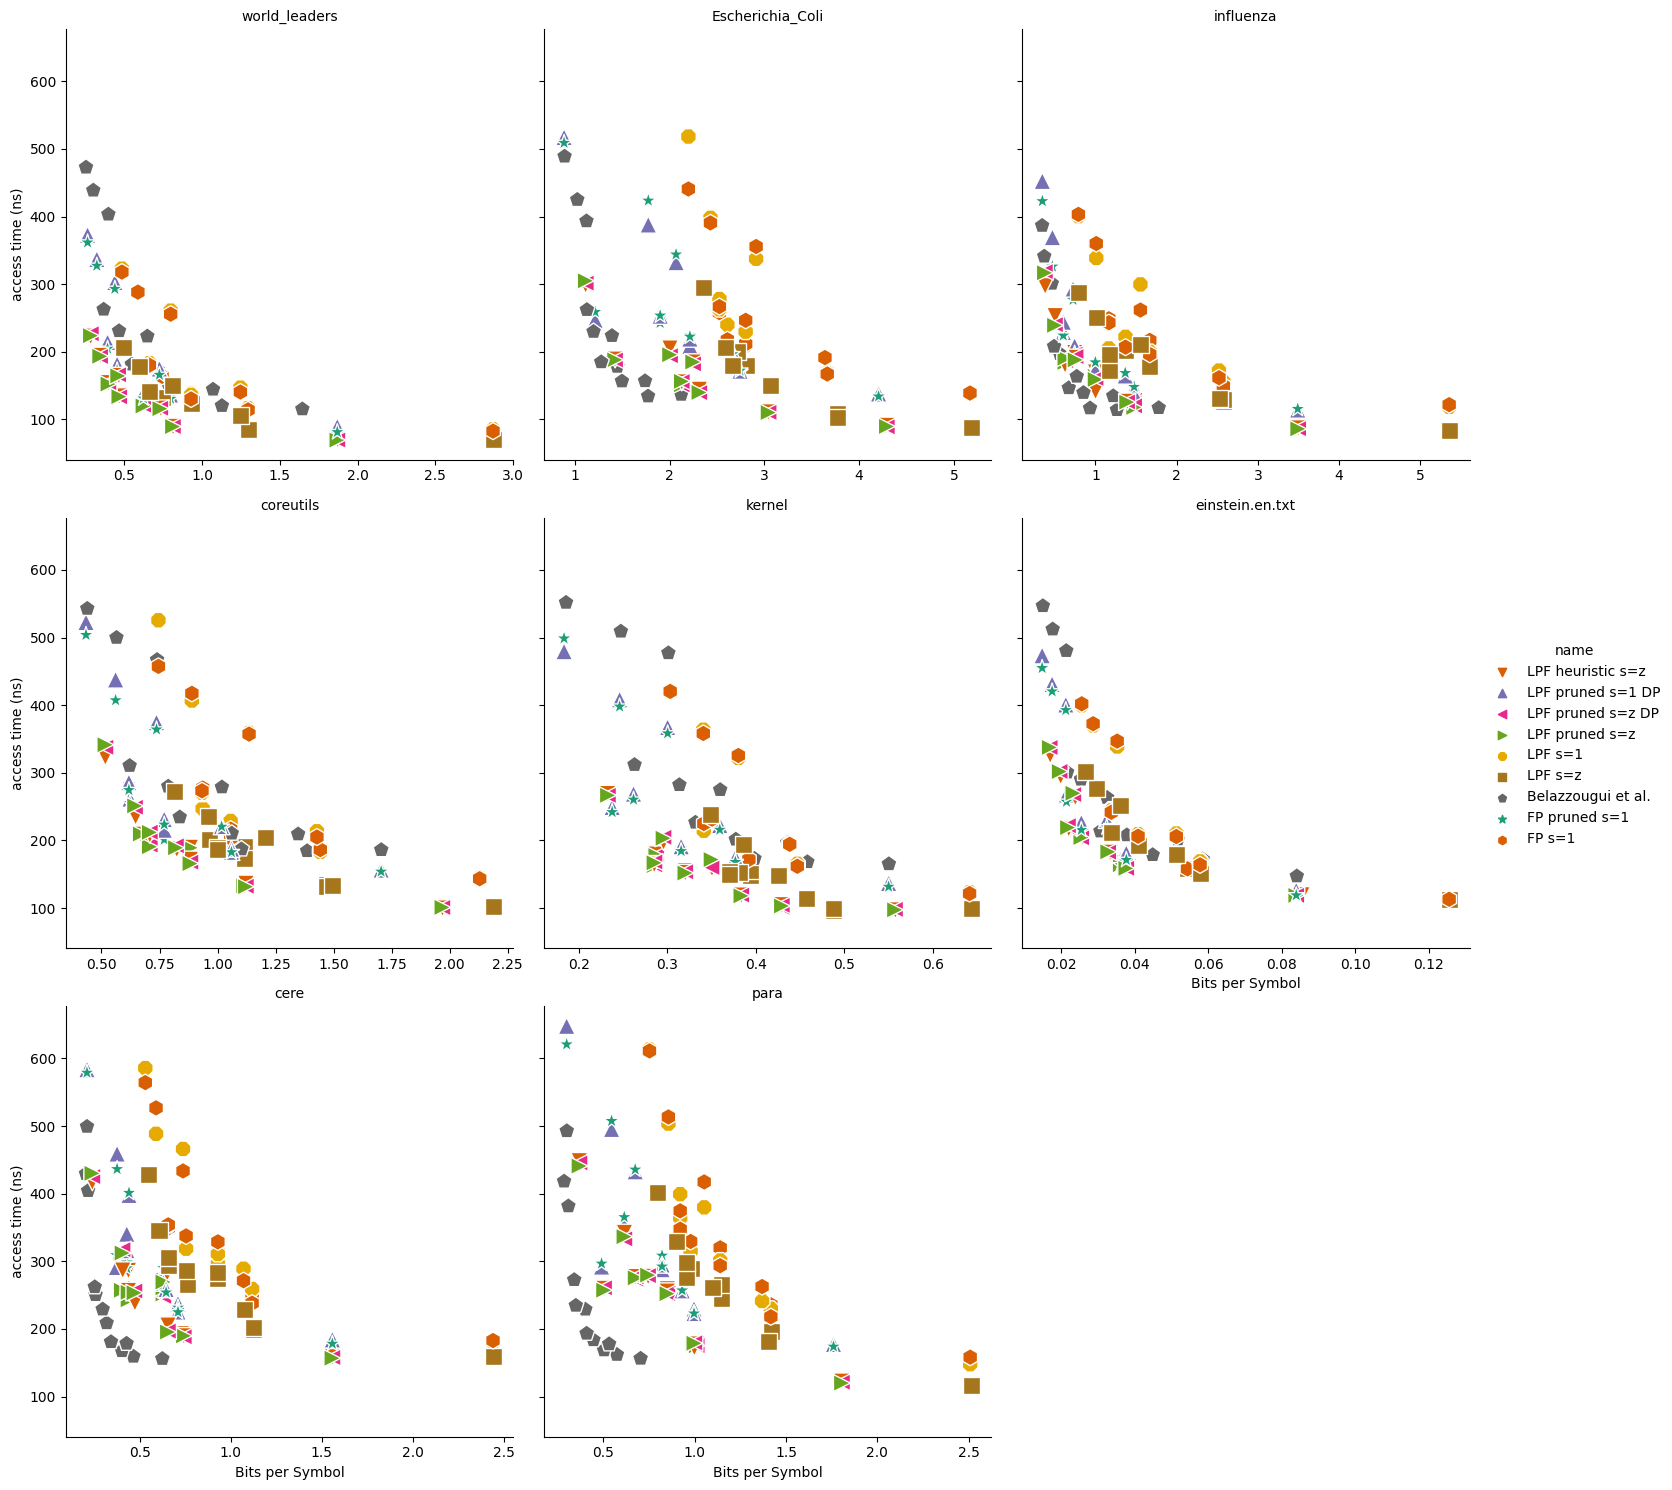

In [3]:
access_size = sns.relplot(y='access_avg', x='bpS', data=nowave, col='text_id',
                         col_wrap=col_wrapping,palette=pal, hue='name', markers=dfmarkers,style='name', s=150,facet_kws={'sharey': True, 'sharex': False})
access_size.set_xlabels('Bits per Symbol')
access_size.set_ylabels('access time (ns)')
access_size.set_titles("{col_name}")
plt.savefig("access_size.pdf")

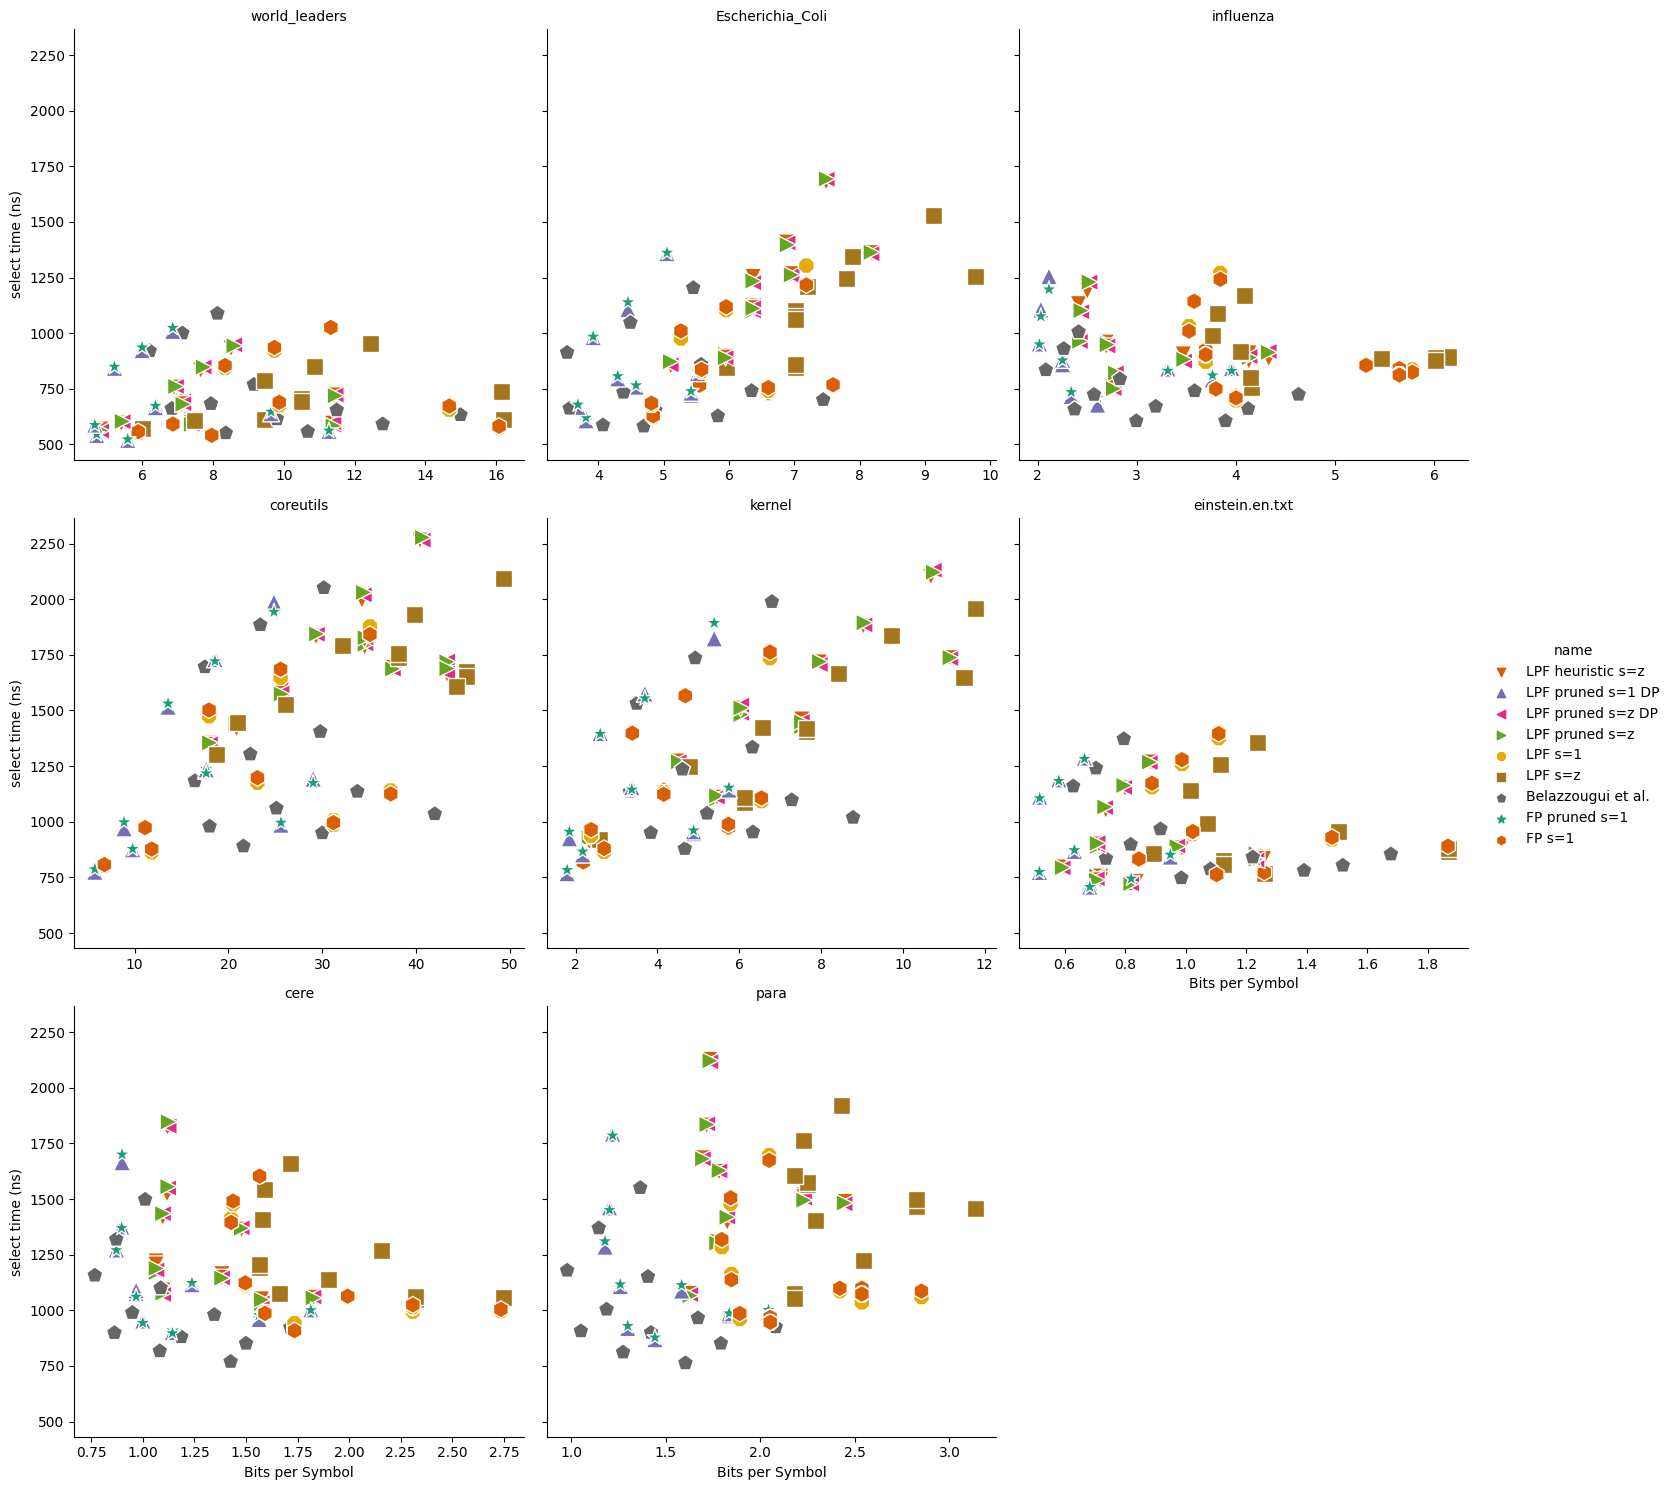

In [4]:
select_size = sns.relplot(y='select_avg', x='bpSrs', data=nowave, col='text_id',
                         col_wrap=col_wrapping,palette=pal, hue='name', markers=dfmarkers,style='name', s=150,facet_kws={'sharey': True, 'sharex': False})
select_size.set_xlabels('Bits per Symbol')
select_size.set_ylabels('select time (ns)')
select_size.set_titles("{col_name}")
plt.savefig("select_size.pdf")

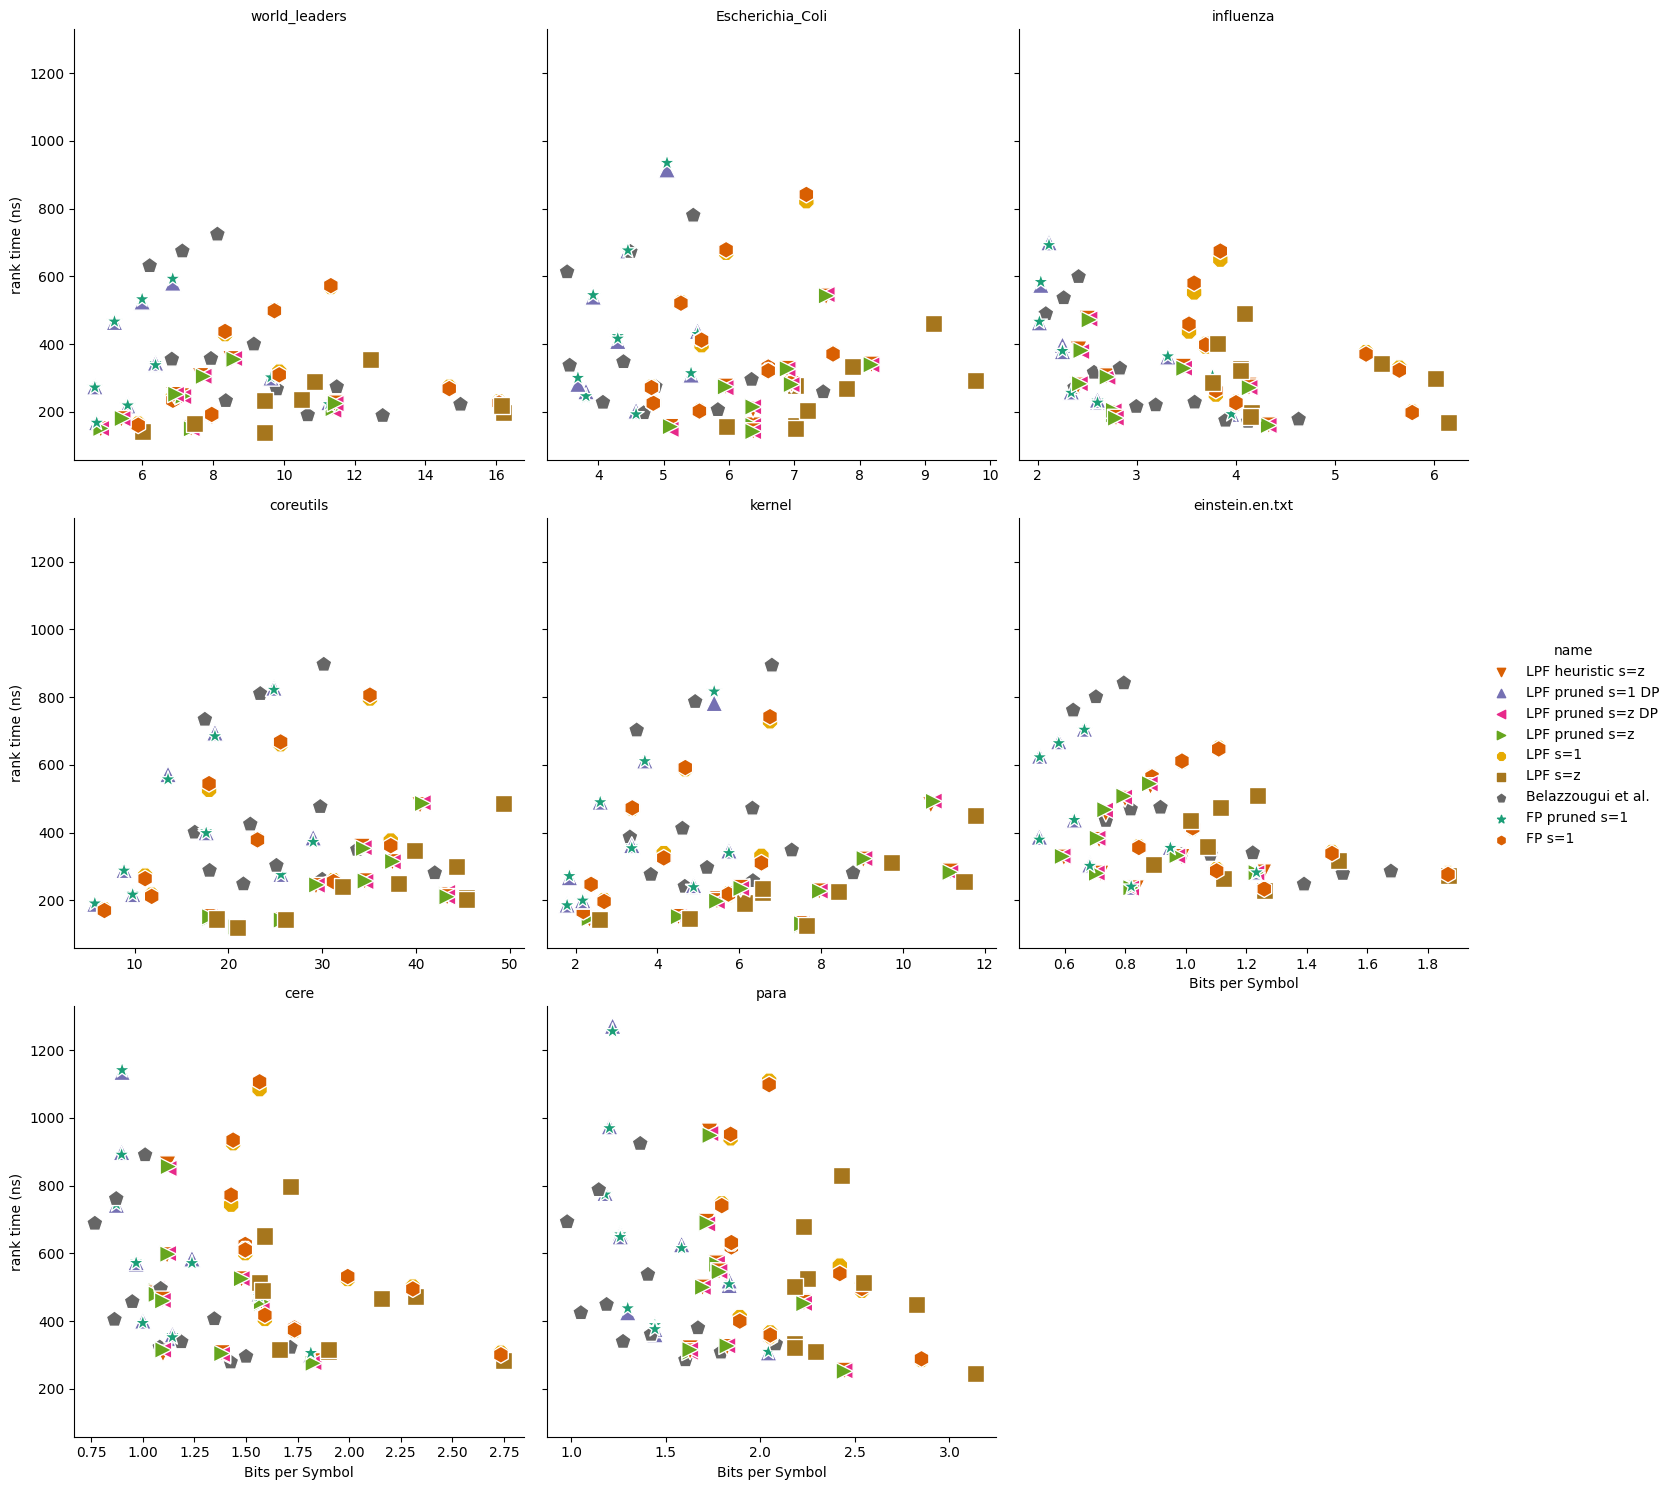

In [5]:
rank_size = sns.relplot(y='rank_avg', x='bpSrs', data=nowave, col='text_id',
                         col_wrap=col_wrapping,palette=pal, hue='name', markers=dfmarkers,style='name', s=150,facet_kws={'sharey': True, 'sharex': False})
rank_size.set_xlabels('Bits per Symbol')
rank_size.set_ylabels('rank time (ns)')
rank_size.set_titles("{col_name}")
plt.savefig("rank_size.pdf")

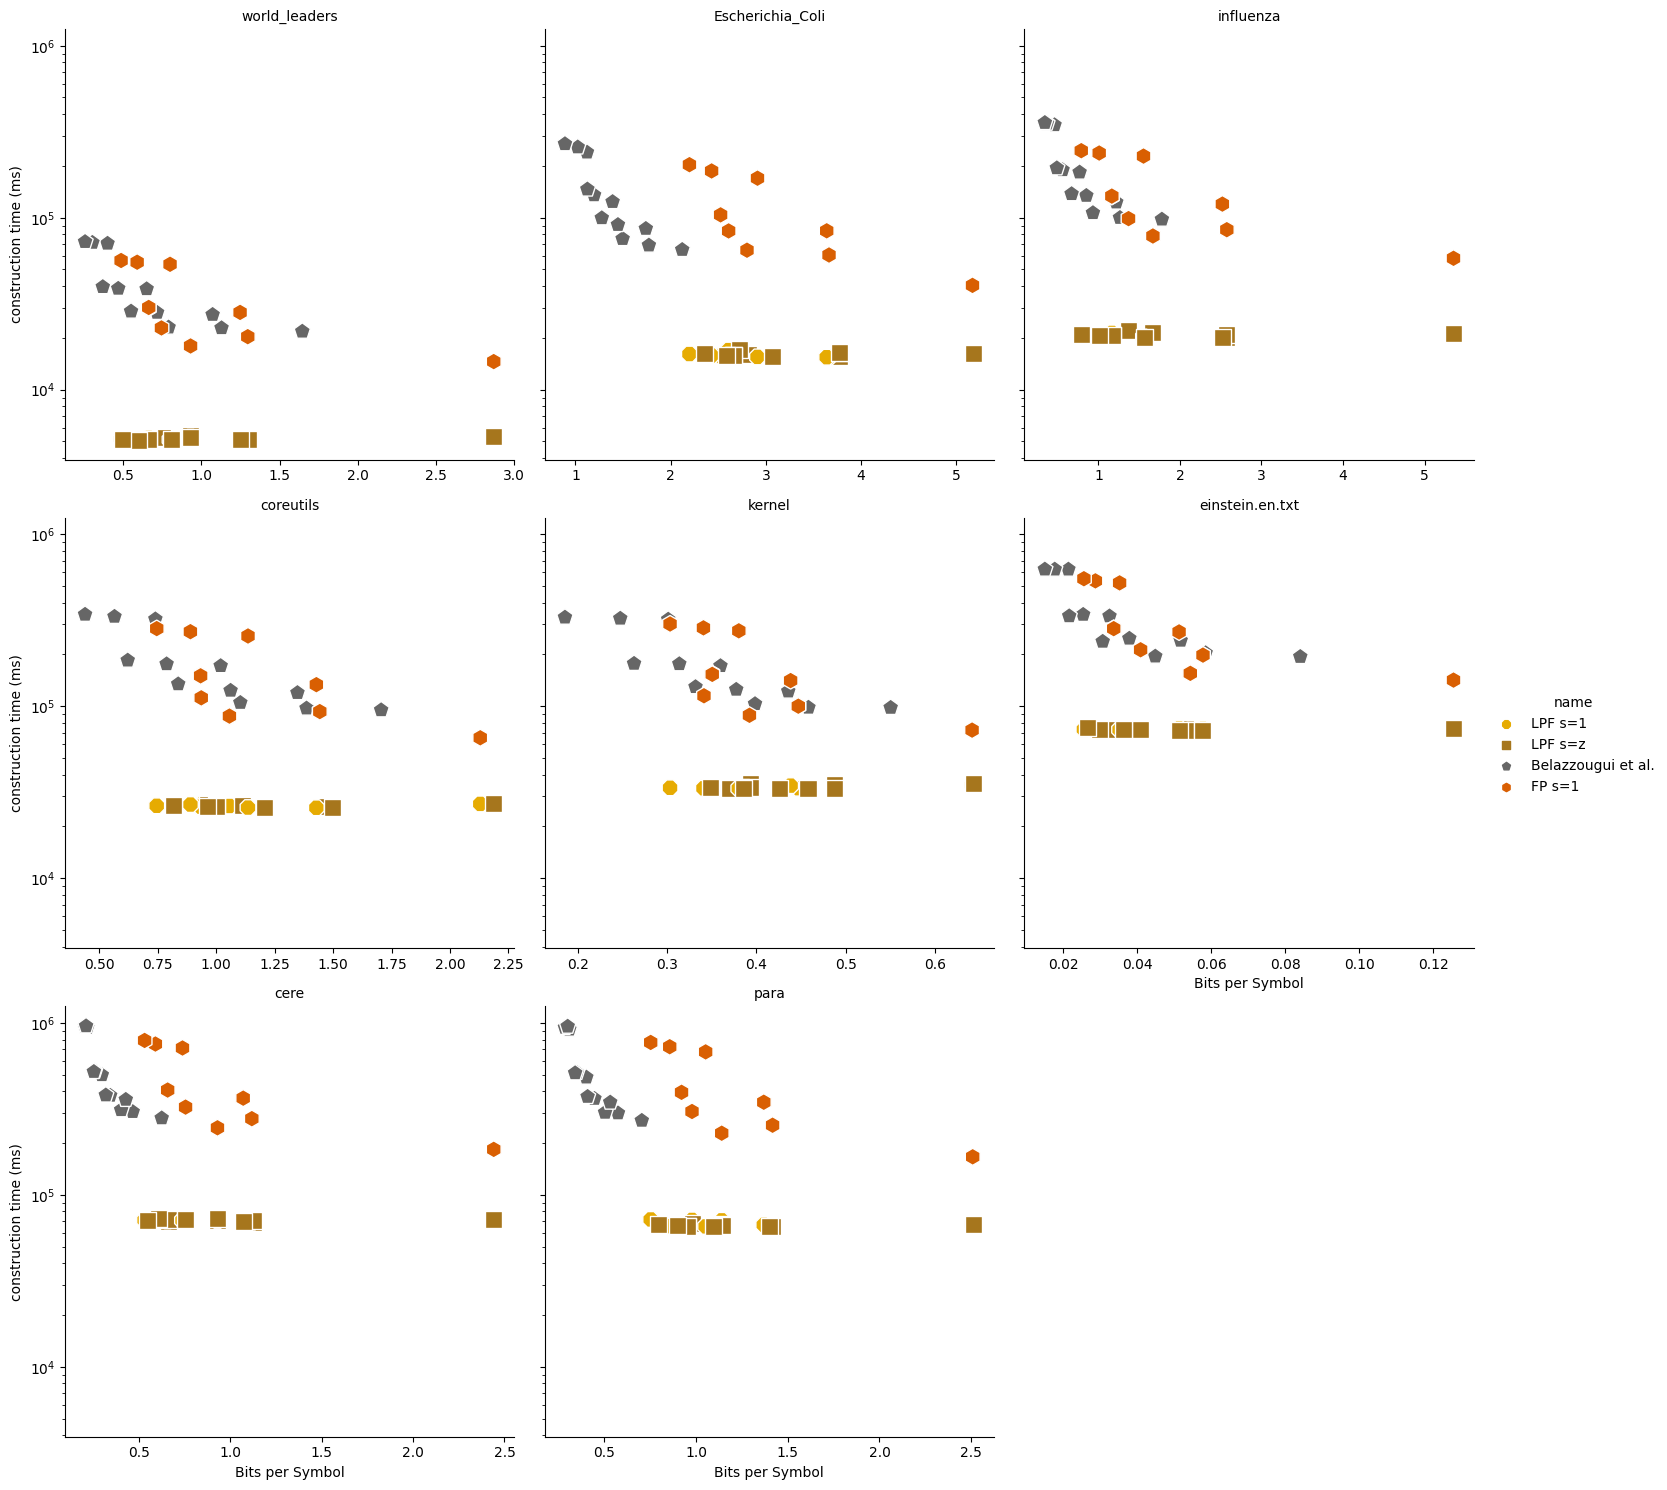

In [6]:
theo_speed_size_log = sns.relplot(y='constr_time', x='bpS', data=theoonly, col='text_id',
                         col_wrap=col_wrapping,palette=pal, hue='name', markers=dfmarkers,style='name', s=150,facet_kws={'sharey': True, 'sharex': False})
theo_speed_size_log.set_xlabels('Bits per Symbol')
theo_speed_size_log.set_ylabels('construction time (ms)')
theo_speed_size_log.set(yscale="log")
theo_speed_size_log.set_titles("{col_name}")
plt.savefig("theo_speed_size_log.pdf")


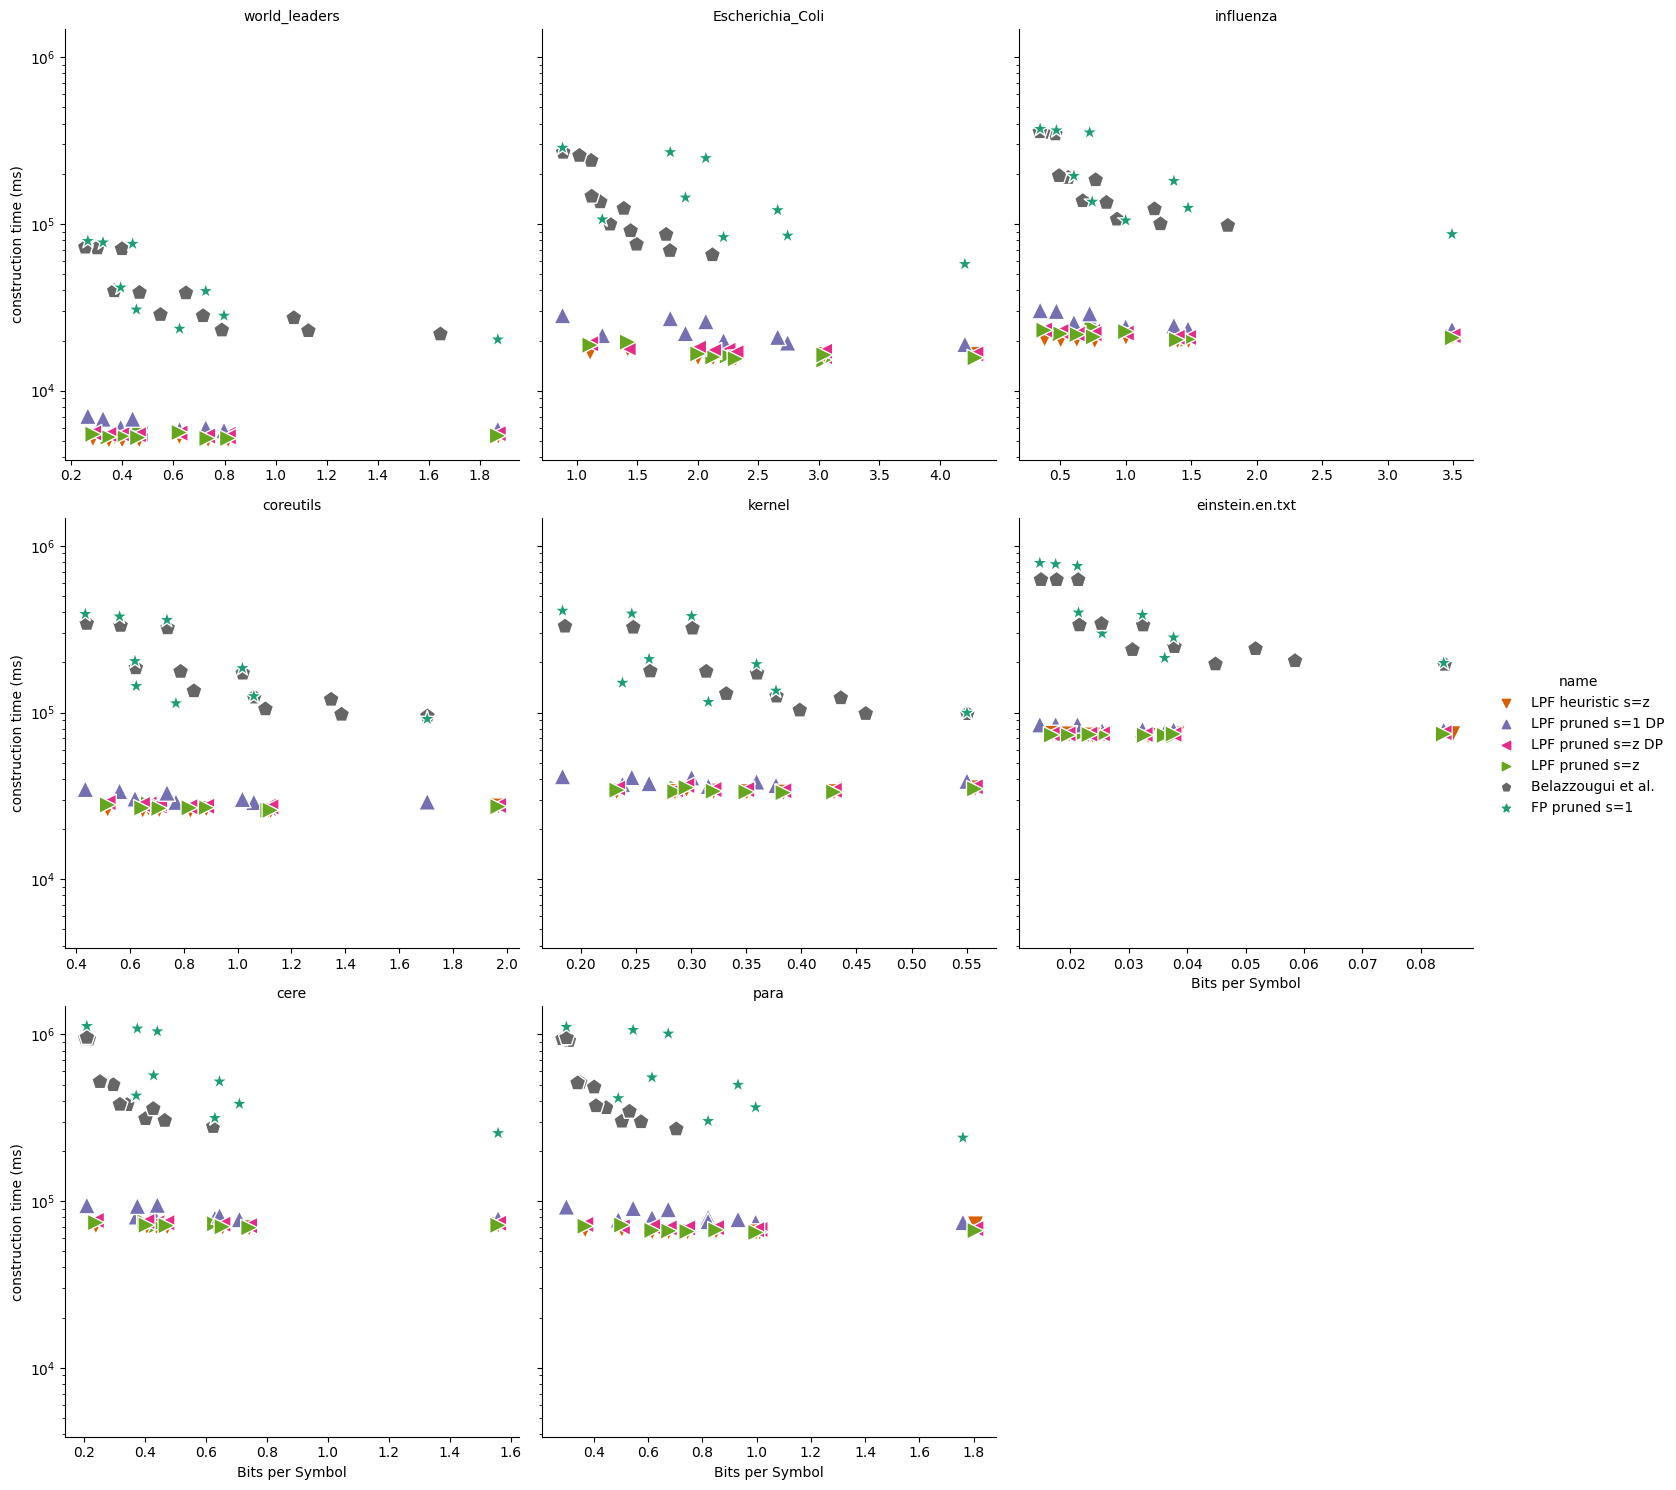

In [7]:
pruned_speed_size_log = sns.relplot(y='constr_time', x='bpS', data=pruned, col='text_id',
                         col_wrap=col_wrapping,palette=pal, hue='name', markers=dfmarkers,style='name', s=150,facet_kws={'sharey': True, 'sharex': False})
pruned_speed_size_log.set_xlabels('Bits per Symbol')
pruned_speed_size_log.set_ylabels('construction time (ms)')
pruned_speed_size_log.set(yscale="log")
pruned_speed_size_log.set_titles("{col_name}")
plt.savefig("pruned_speed_size_log.pdf")

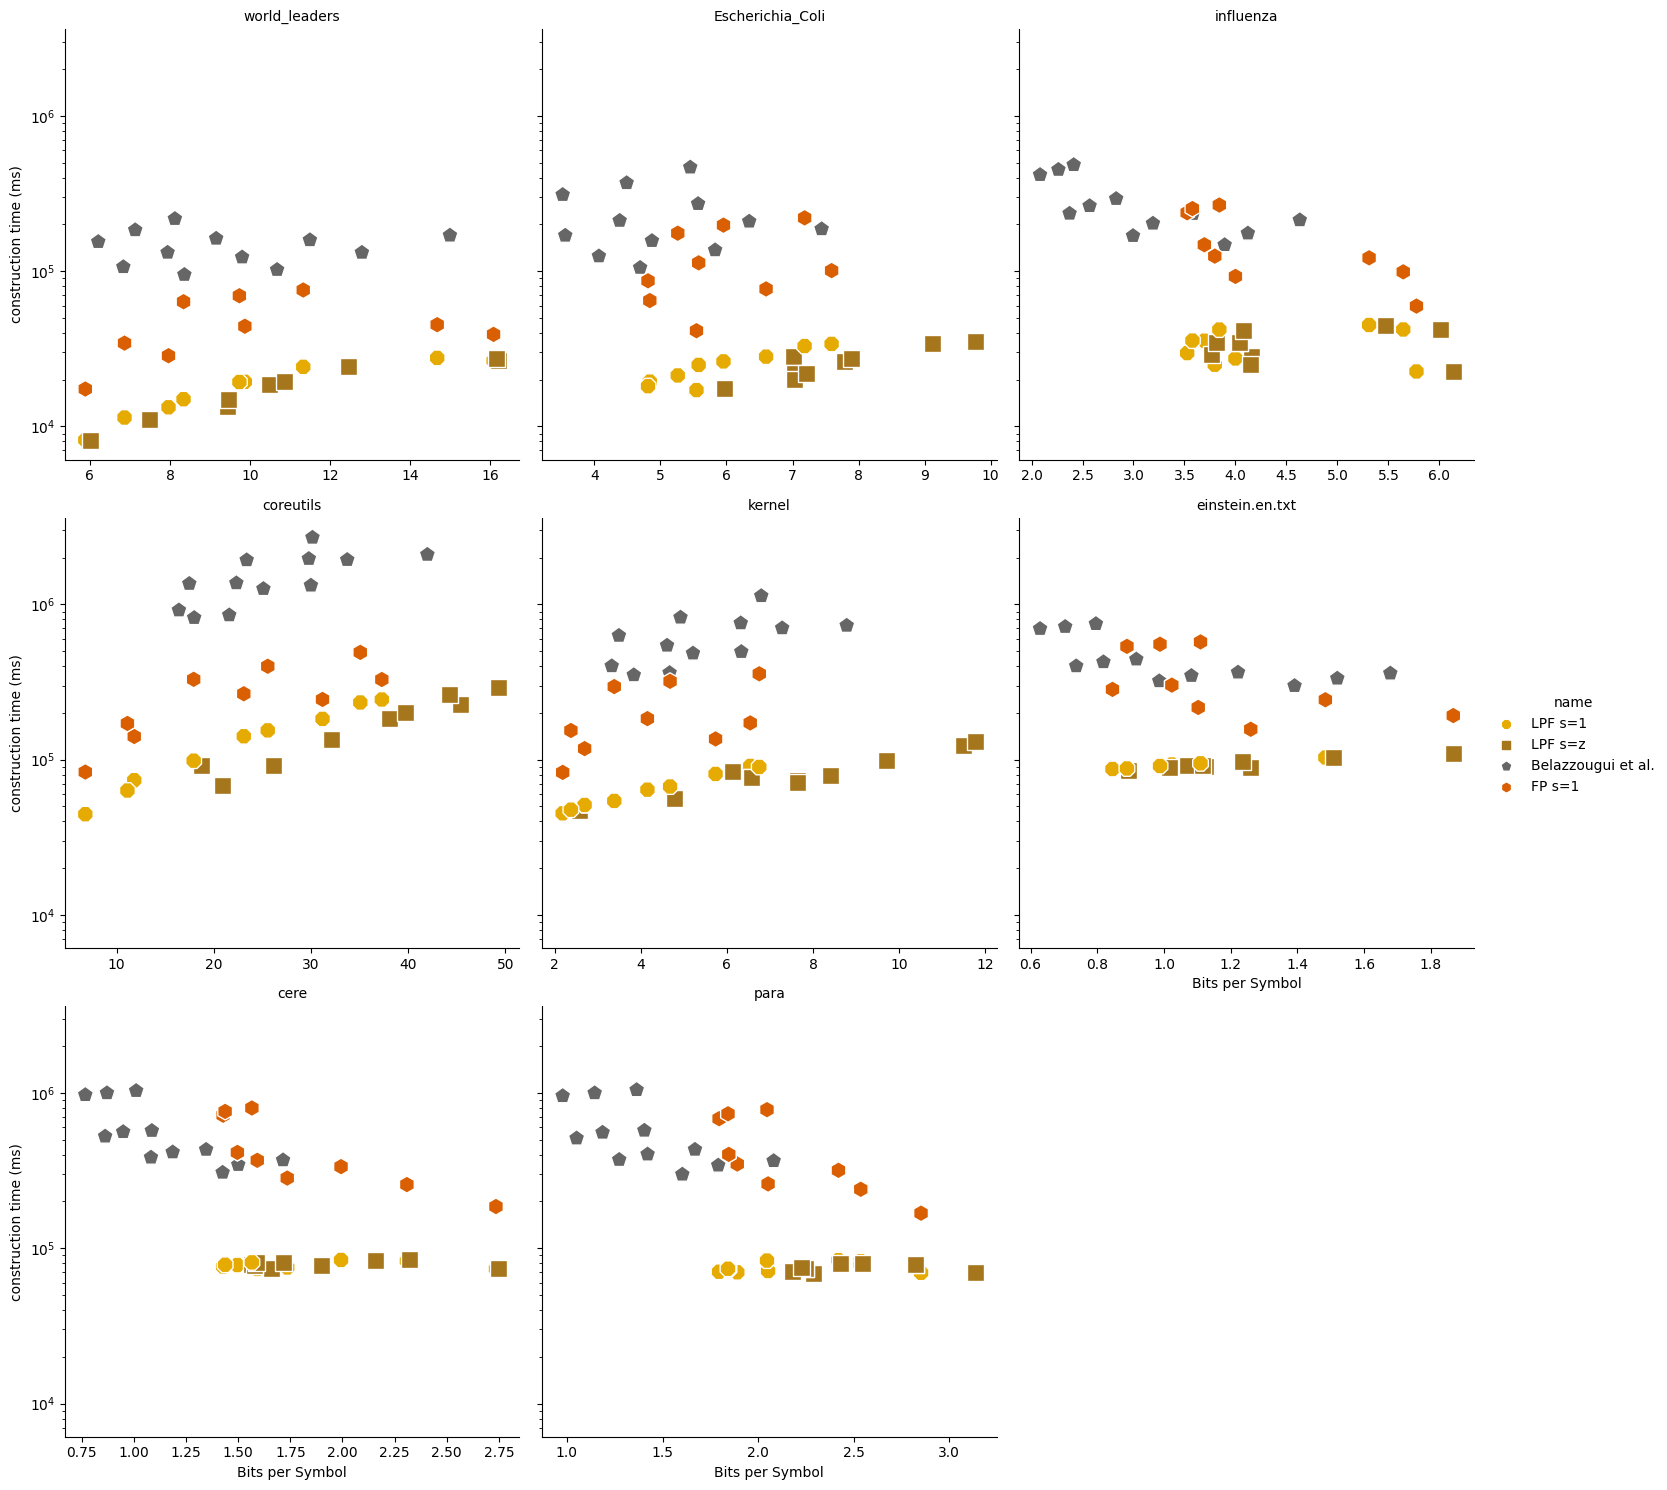

In [8]:
theo_speed_size_log_rs = sns.relplot(y='constr_time_rs', x='bpSrs', data=theoonly, col='text_id',
                         col_wrap=col_wrapping,palette=pal, hue='name', markers=dfmarkers,style='name', s=150,facet_kws={'sharey': True, 'sharex': False})
theo_speed_size_log_rs.set_xlabels('Bits per Symbol')
theo_speed_size_log_rs.set_ylabels('construction time (ms)')
theo_speed_size_log_rs.set(yscale="log")
theo_speed_size_log_rs.set_titles("{col_name}")
plt.savefig("theo_speed_size_log_rs.pdf")

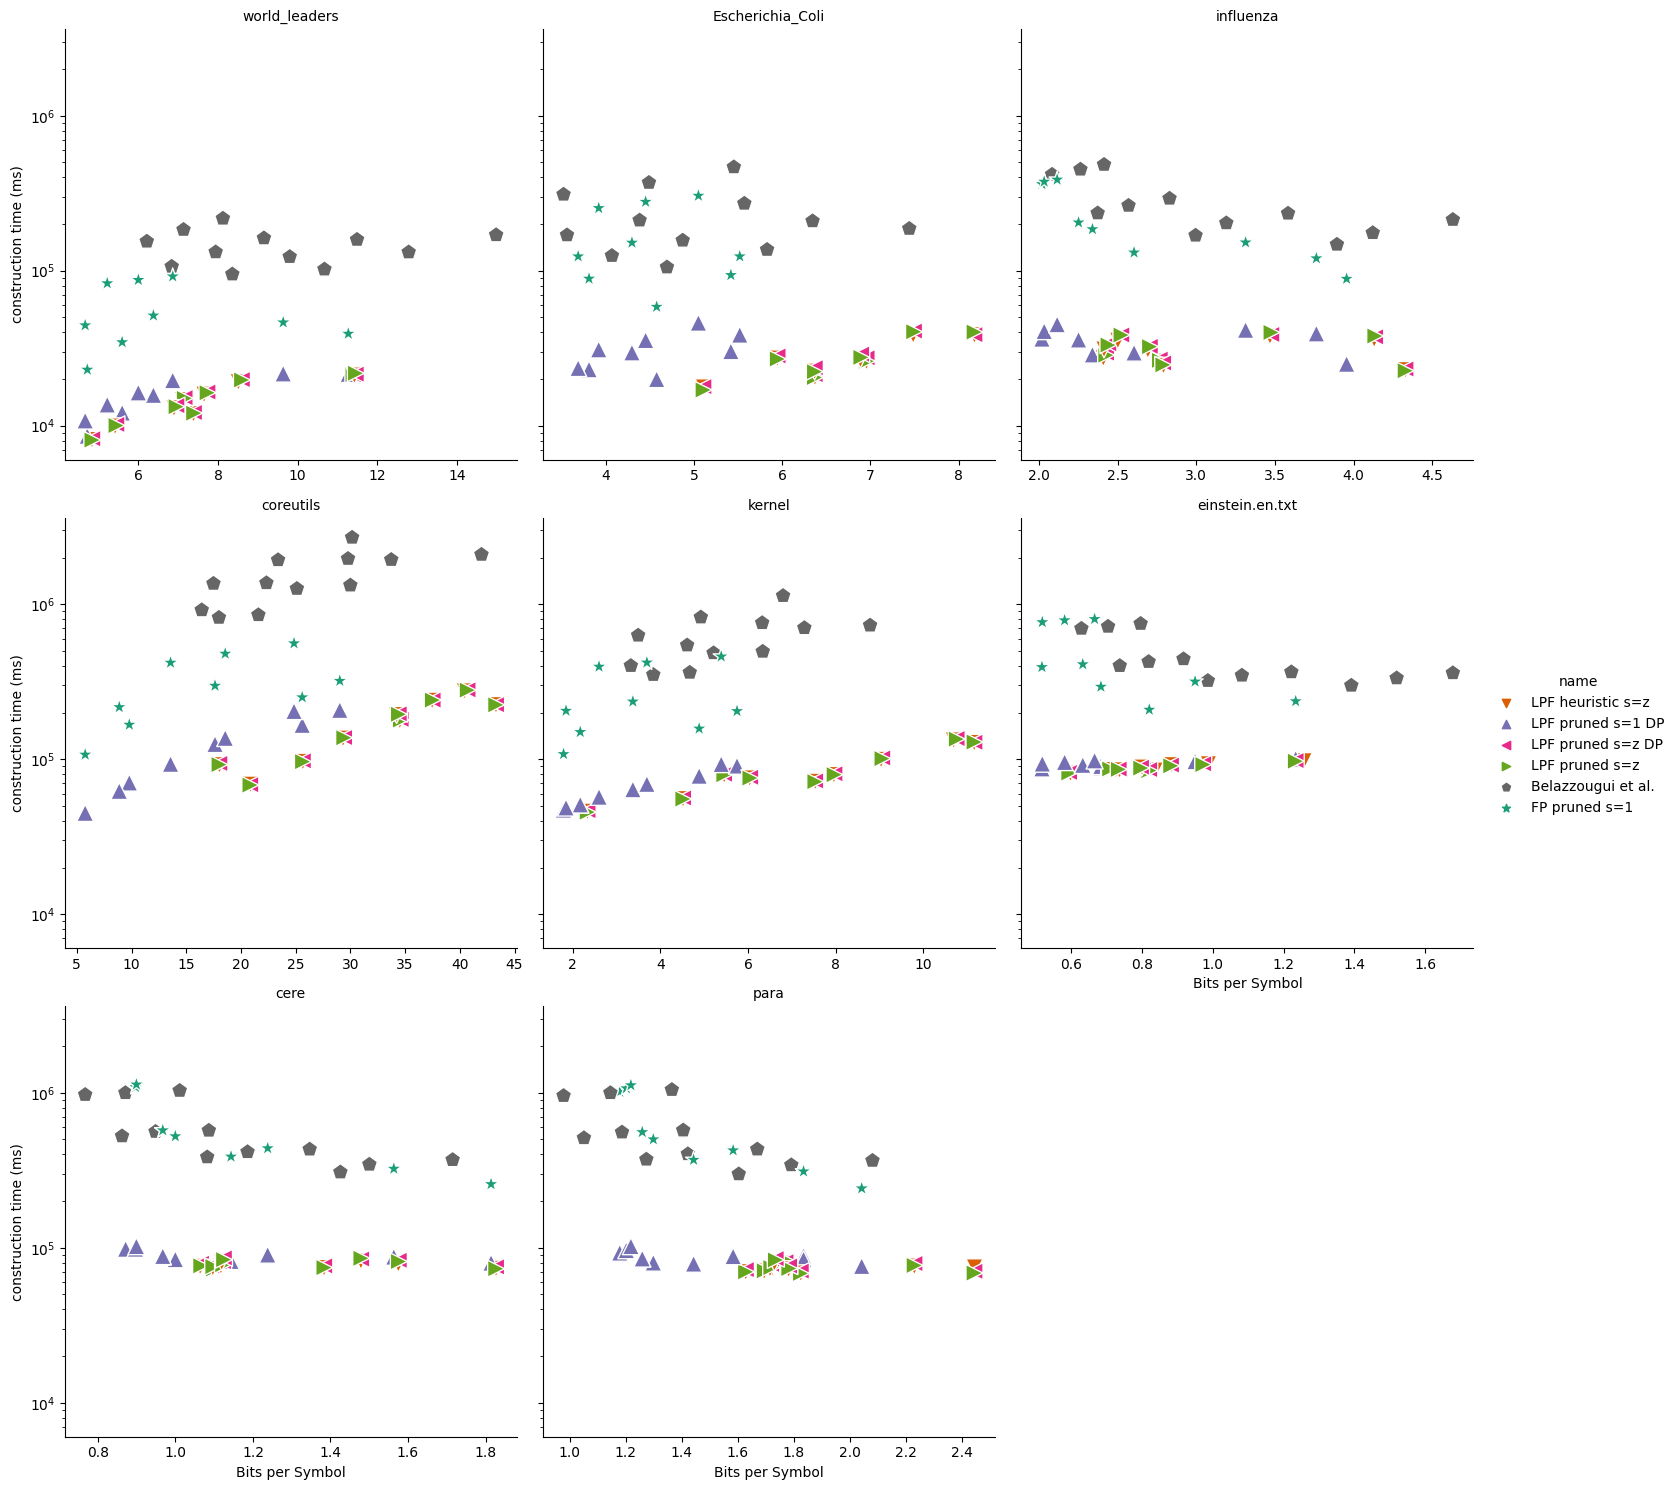

In [9]:
pruned_speed_size_log_rs = sns.relplot(y='constr_time_rs', x='bpSrs', data=pruned, col='text_id',
                         col_wrap=col_wrapping,palette=pal, hue='name', markers=dfmarkers,style='name', s=150,facet_kws={'sharey': True, 'sharex': False})
pruned_speed_size_log_rs.set_xlabels('Bits per Symbol')
pruned_speed_size_log_rs.set_ylabels('construction time (ms)')
pruned_speed_size_log_rs.set(yscale="log")
pruned_speed_size_log_rs.set_titles("{col_name}")
plt.savefig("pruned_speed_size_log_rs.pdf")

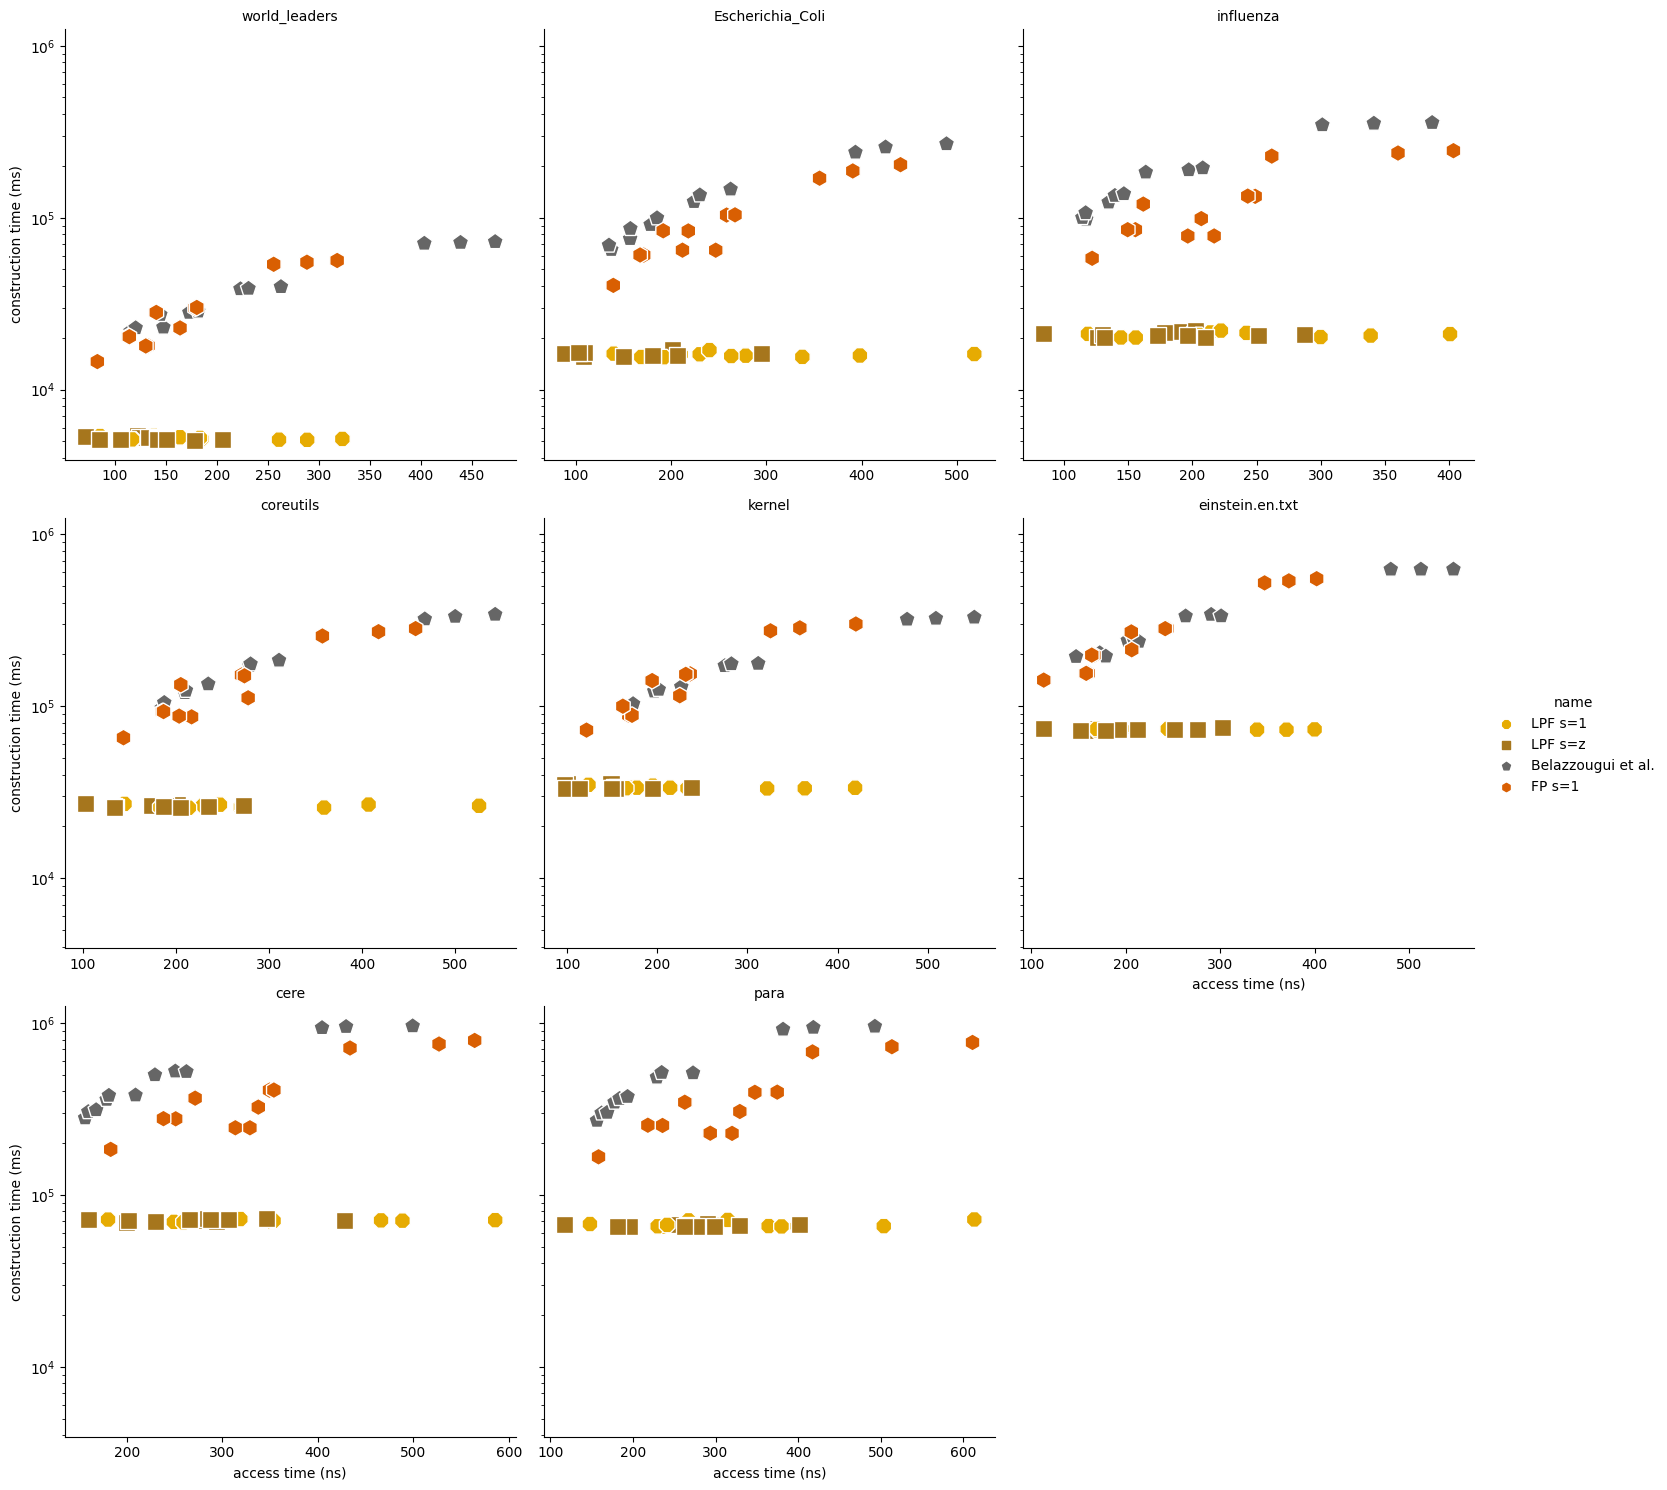

In [10]:
theo_speed_access_log = sns.relplot(y='constr_time', x='access_avg', data=theoonly, col='text_id',
                         col_wrap=col_wrapping,palette=pal, hue='name', markers=dfmarkers,style='name', s=150,facet_kws={'sharey': True, 'sharex': False})
theo_speed_access_log.set_xlabels('access time (ns)')
theo_speed_access_log.set_ylabels('construction time (ms)')
theo_speed_access_log.set(yscale="log")
theo_speed_access_log.set_titles("{col_name}")
plt.savefig("theo_speed_access_log.pdf")

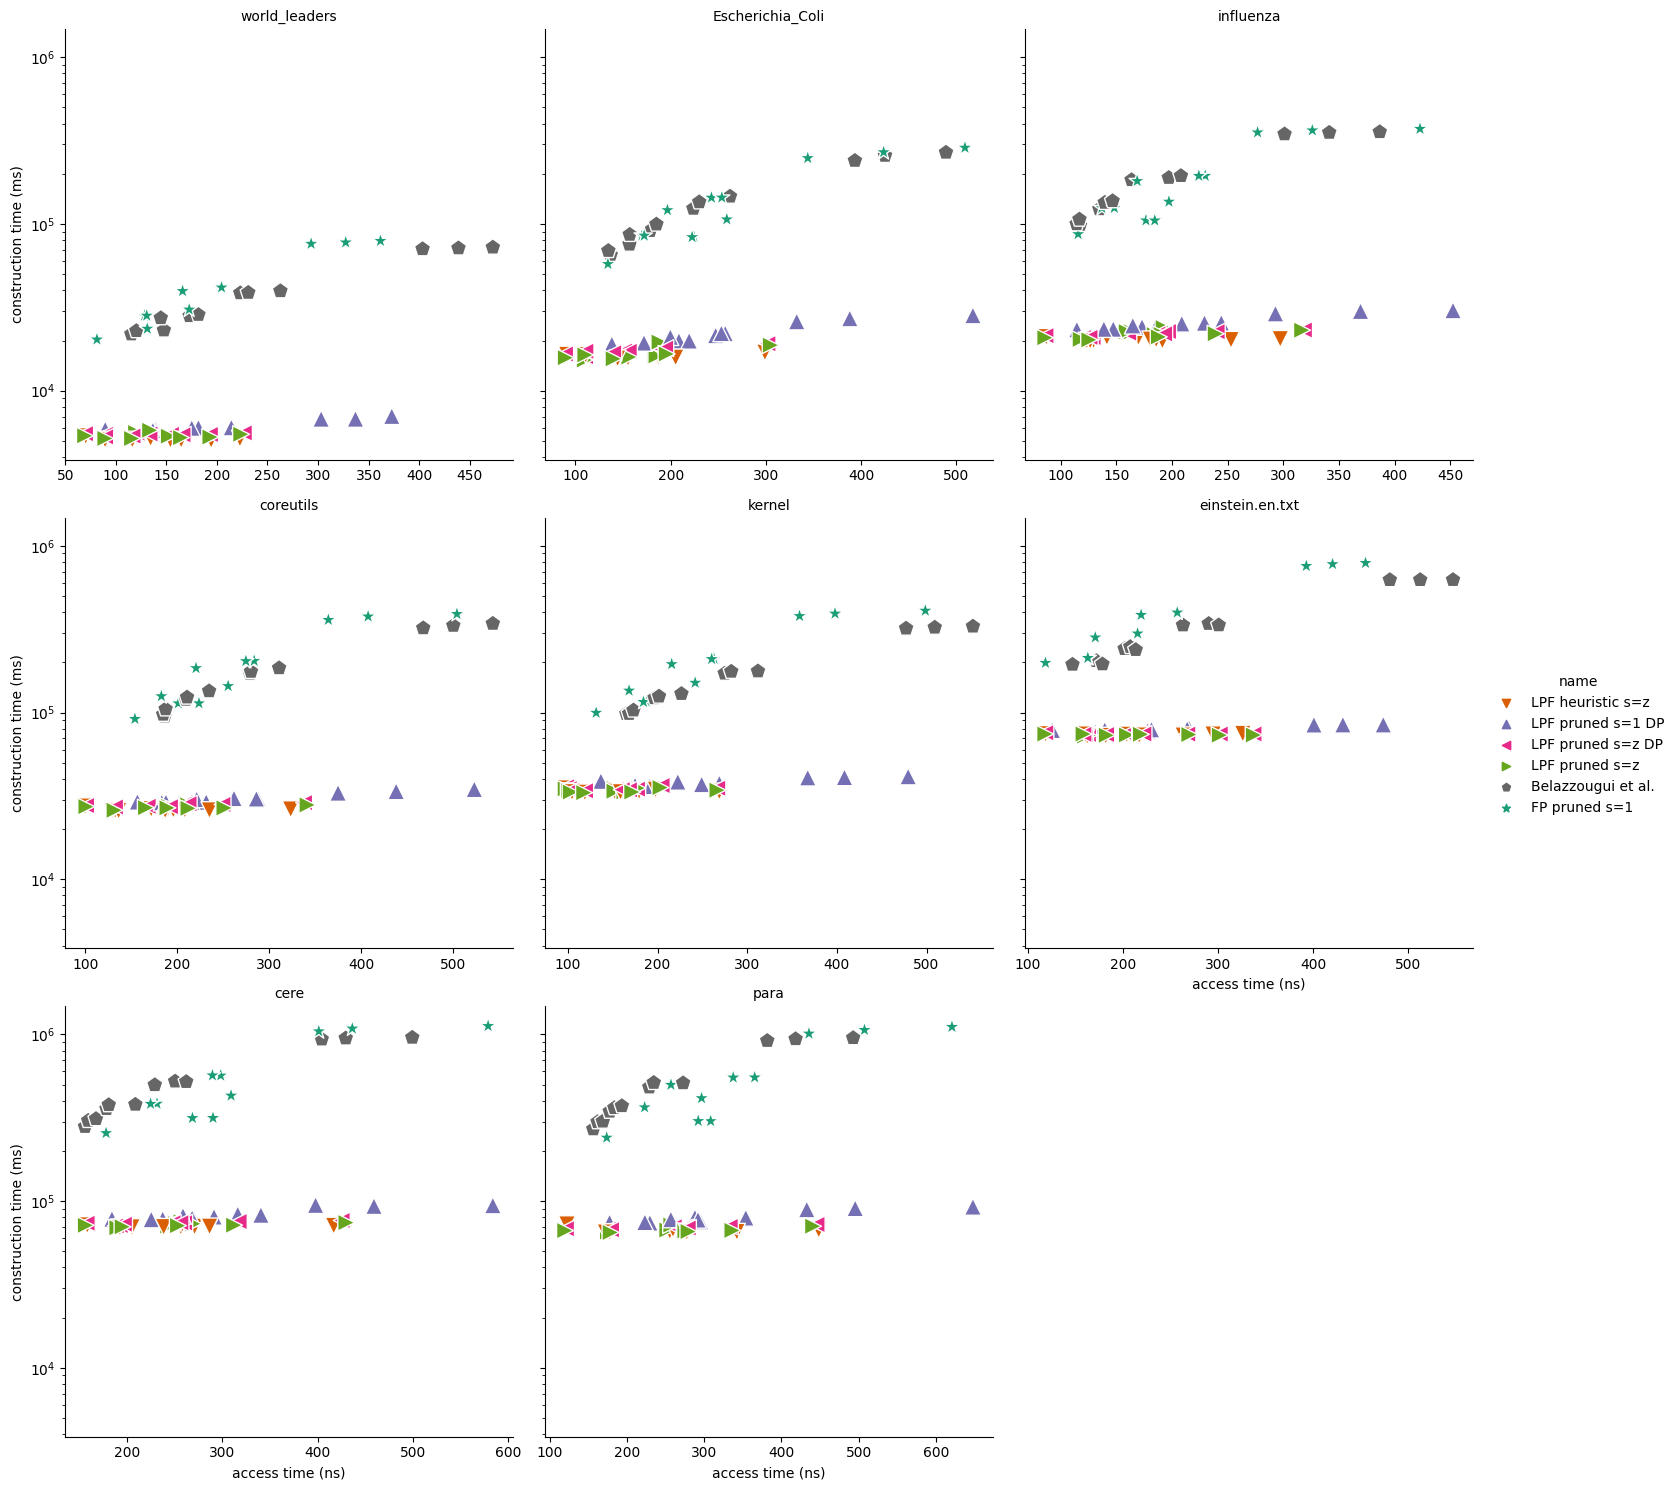

In [11]:
pruned_speed_access_log = sns.relplot(y='constr_time', x='access_avg', data=pruned, col='text_id',
                         col_wrap=col_wrapping,palette=pal, hue='name', markers=dfmarkers,style='name', s=150,facet_kws={'sharey': True, 'sharex': False})
pruned_speed_access_log.set_xlabels('access time (ns)')
pruned_speed_access_log.set_ylabels('construction time (ms)')
pruned_speed_access_log.set(yscale="log")
pruned_speed_access_log.set_titles("{col_name}")
plt.savefig("pruned_speed_access_log.pdf")

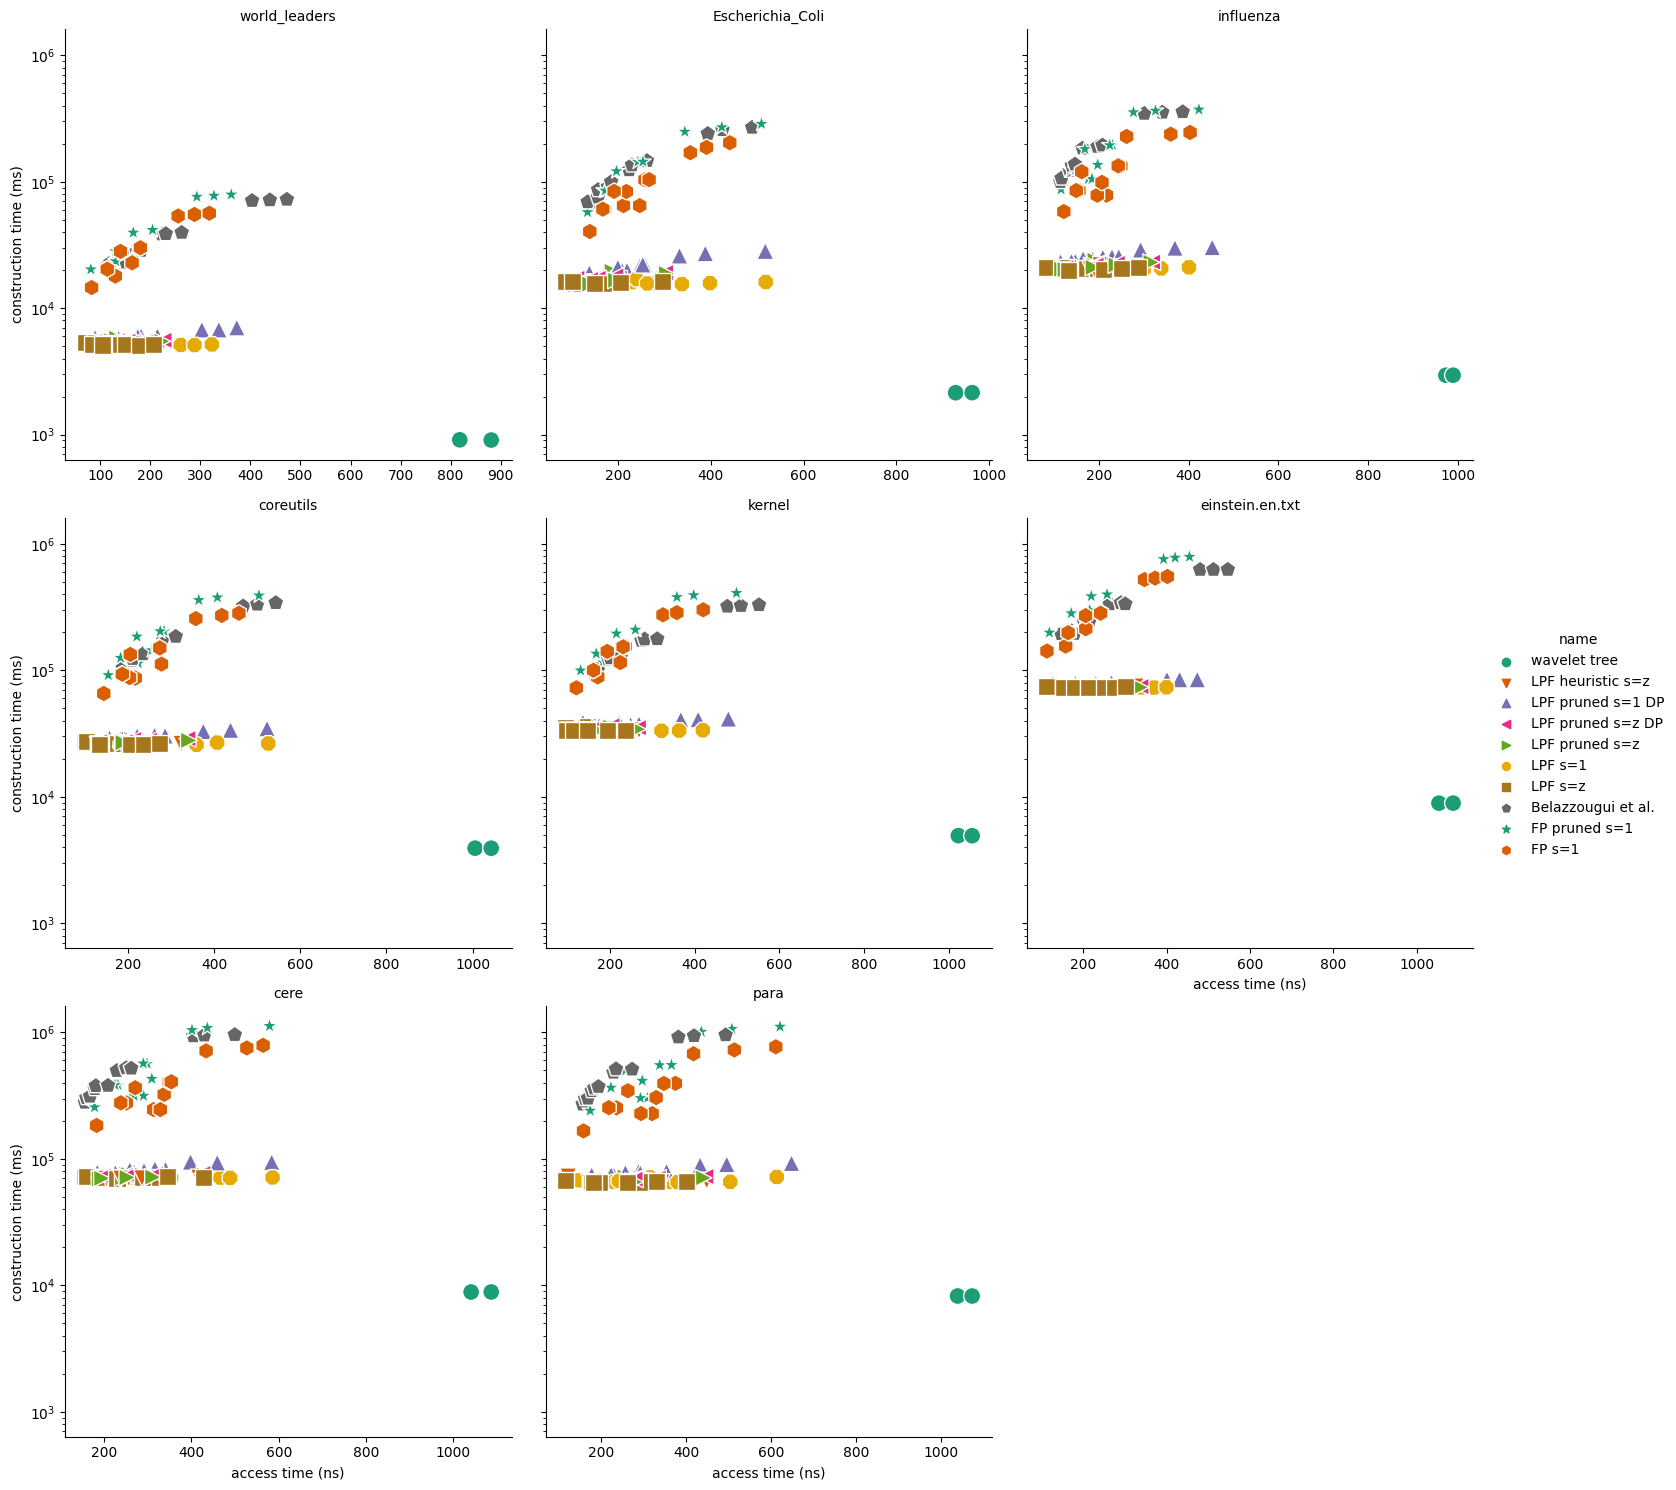

In [12]:
wavelet_speed_access_log = sns.relplot(y='constr_time', x='access_avg', data=df, col='text_id',
                         col_wrap=col_wrapping,palette=pal, hue='name', markers=dfmarkers,style='name', s=150,facet_kws={'sharey': True, 'sharex': False})
wavelet_speed_access_log.set_xlabels('access time (ns)')
wavelet_speed_access_log.set_ylabels('construction time (ms)')
wavelet_speed_access_log.set(yscale="log")
wavelet_speed_access_log.set_titles("{col_name}")
plt.savefig("wavelet_speed_access_log.pdf")

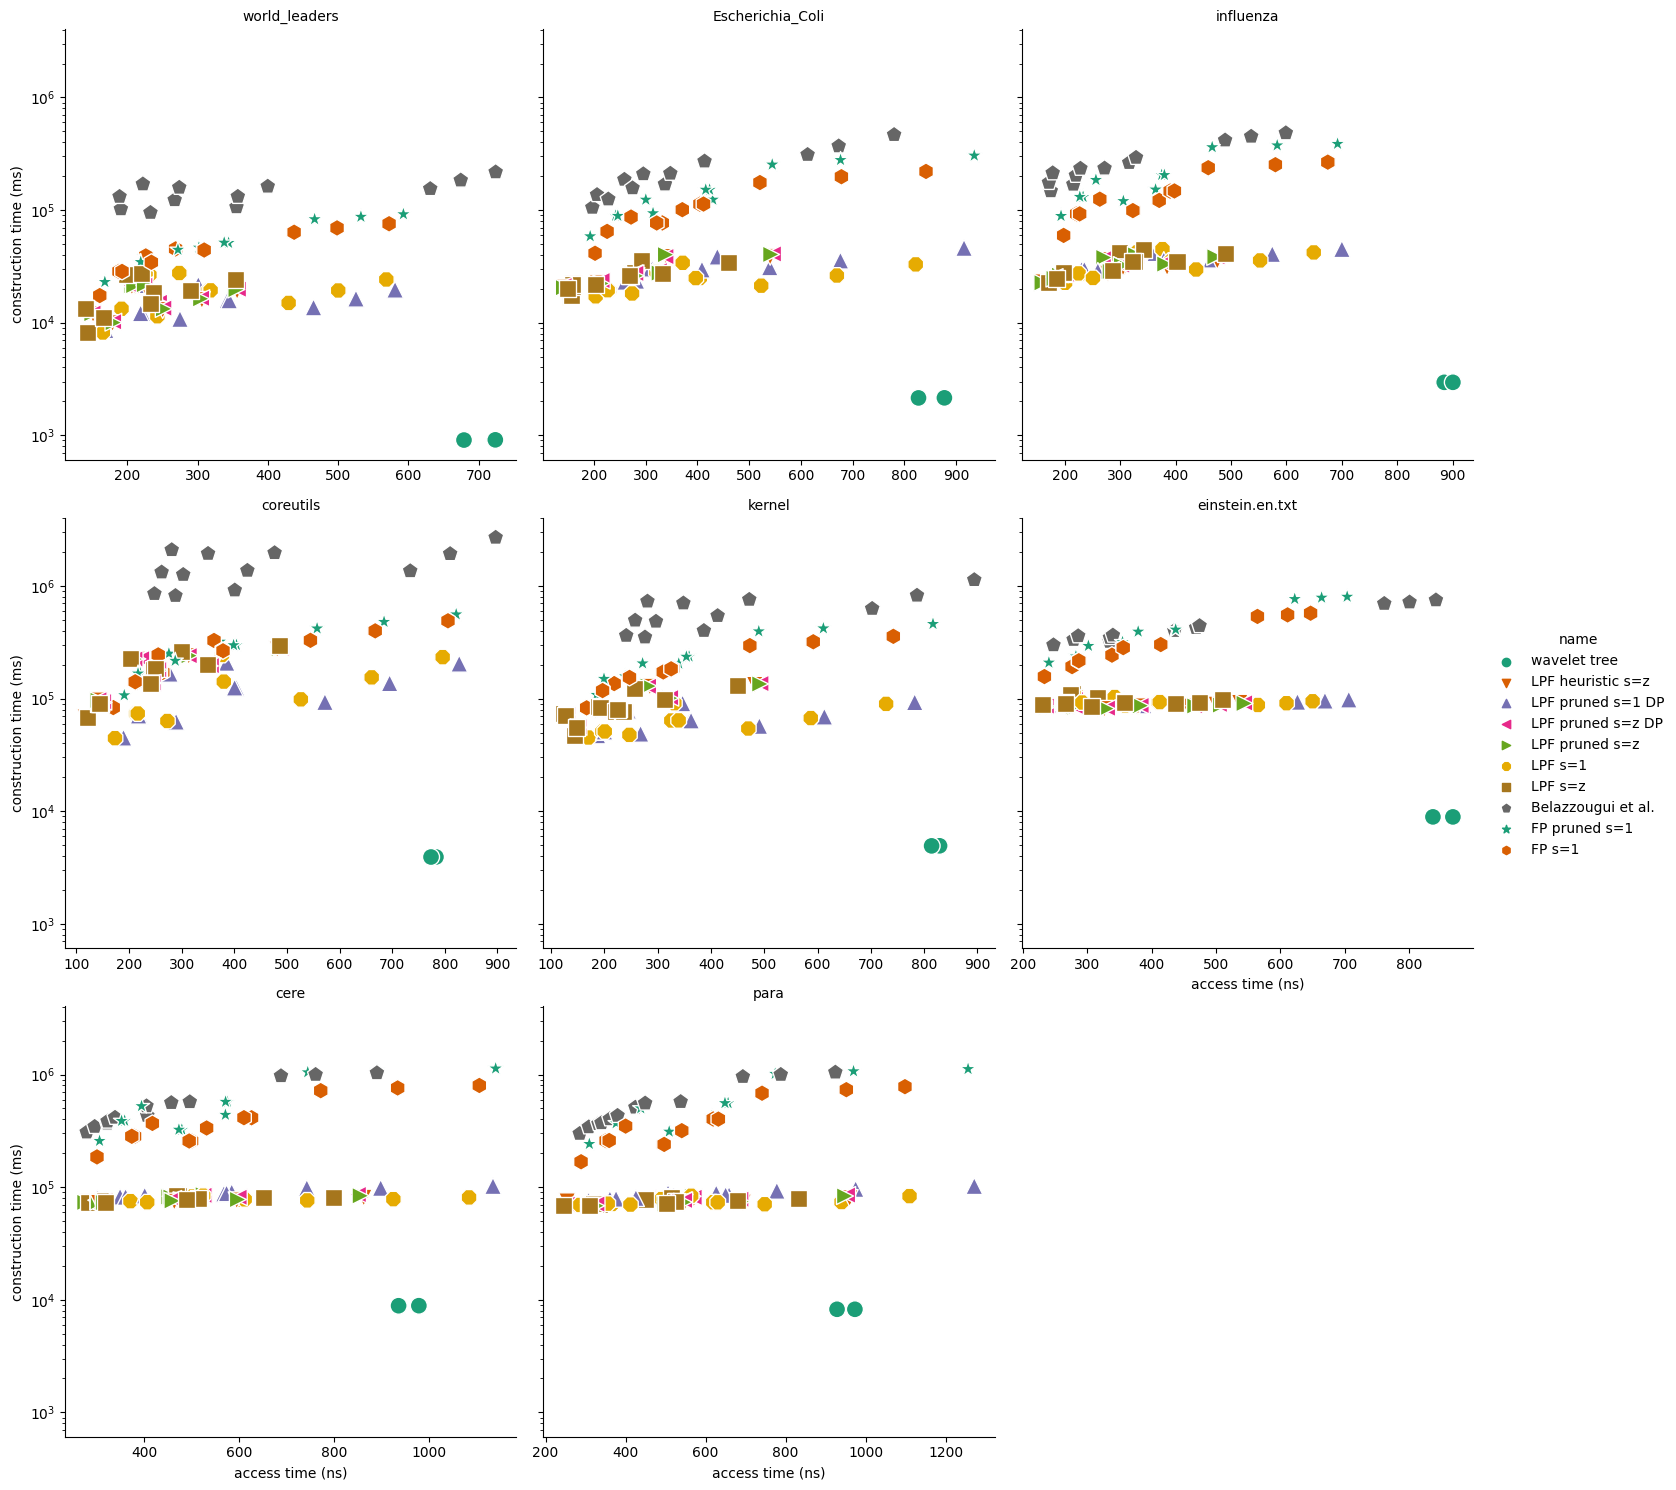

In [13]:
wavelet_speed_rank_log = sns.relplot(y='constr_time_rs', x='rank_avg', data=df, col='text_id',
                         col_wrap=col_wrapping,palette=pal, hue='name', markers=dfmarkers,style='name', s=150,facet_kws={'sharey': True, 'sharex': False})
wavelet_speed_rank_log.set_xlabels('access time (ns)')
wavelet_speed_rank_log.set_ylabels('construction time (ms)')
wavelet_speed_rank_log.set(yscale="log")
wavelet_speed_rank_log.set_titles("{col_name}")
plt.savefig("wavelet_speed_access_log.pdf")

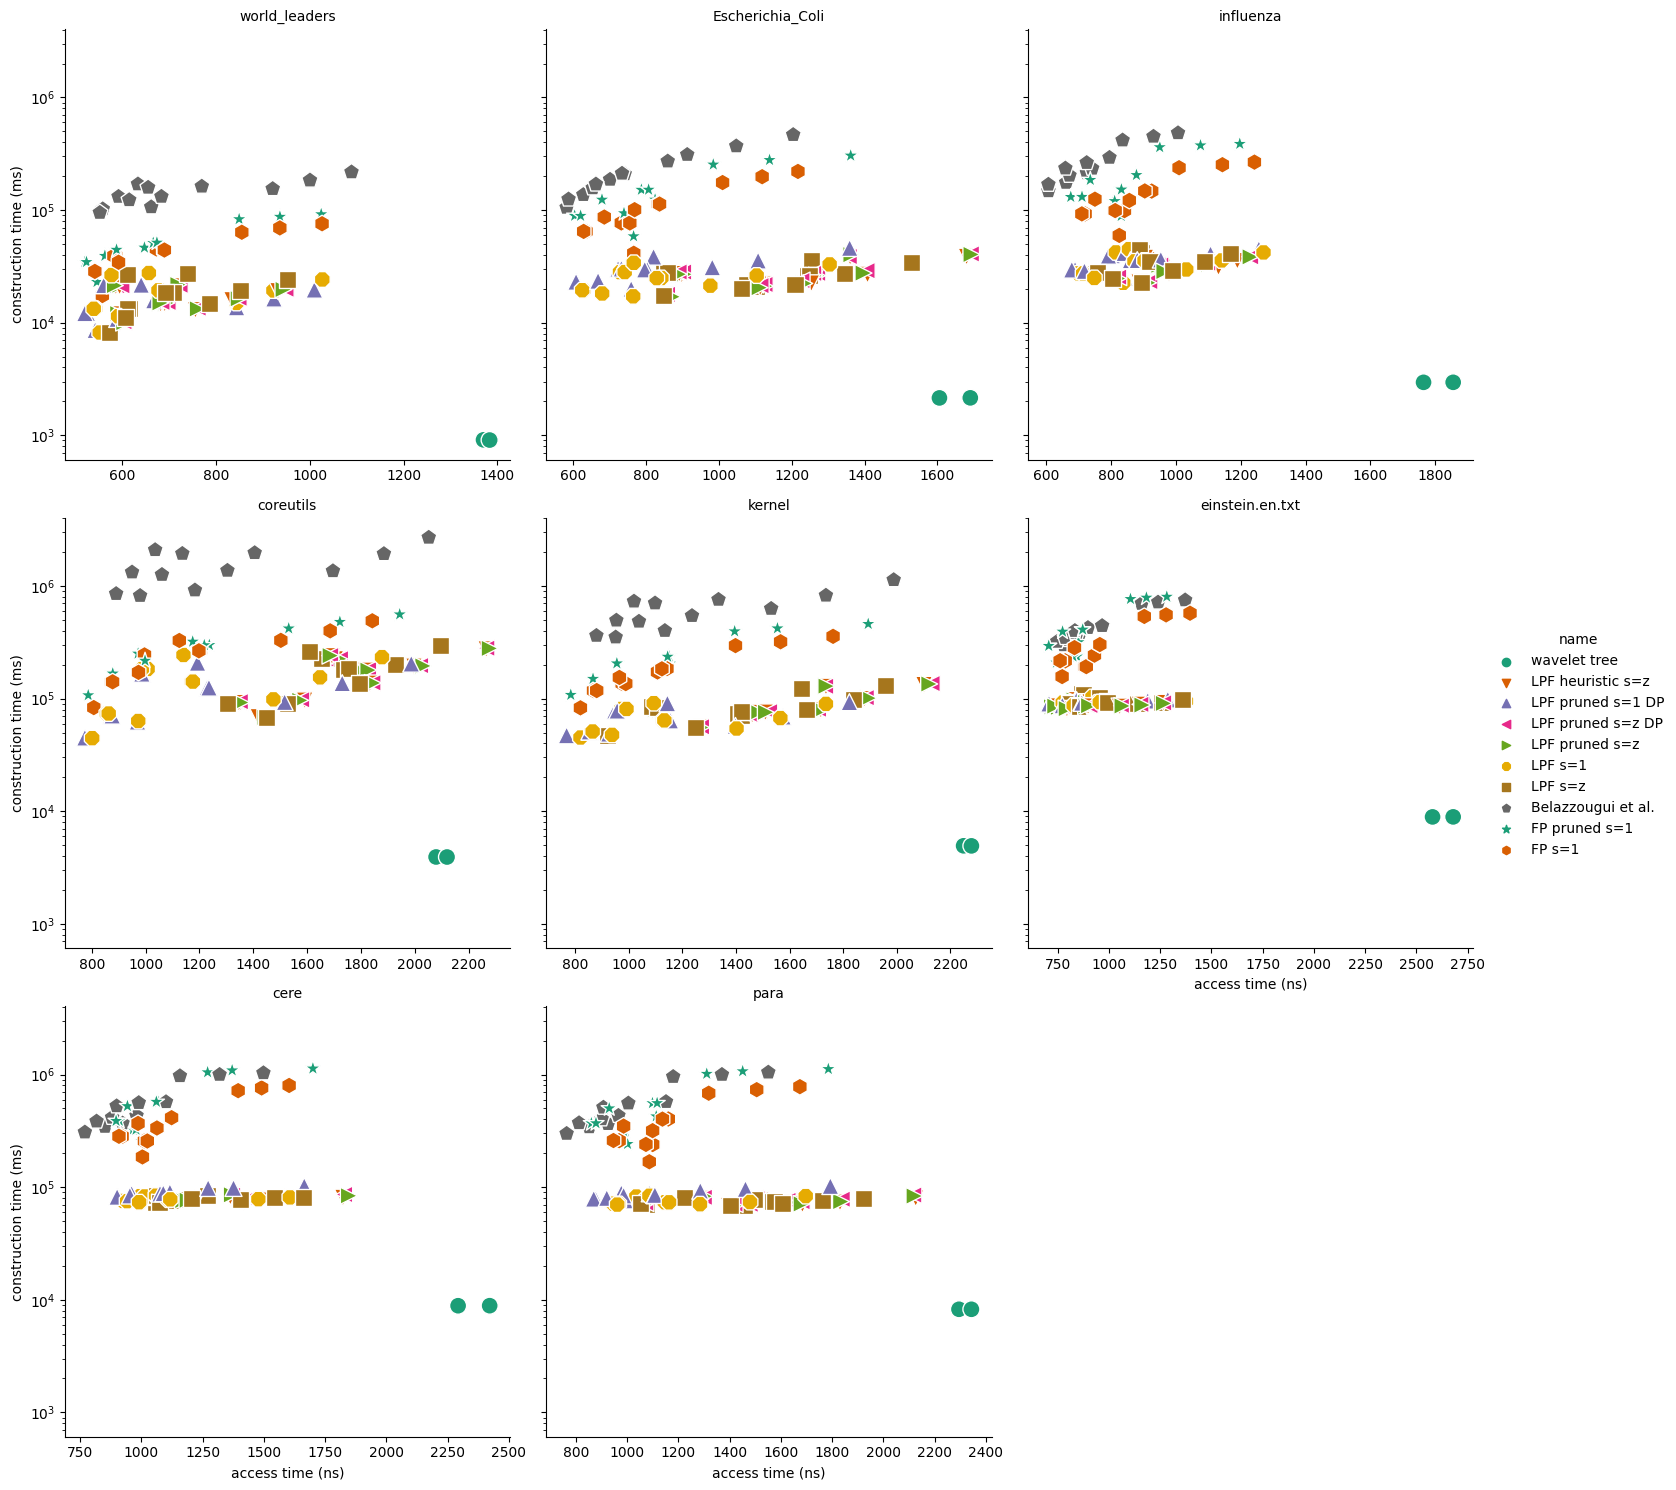

In [14]:
wavelet_speed_select_log = sns.relplot(y='constr_time_rs', x='select_avg', data=df, col='text_id',
                         col_wrap=col_wrapping,palette=pal, hue='name', markers=dfmarkers,style='name', s=150,facet_kws={'sharey': True, 'sharex': False})
wavelet_speed_select_log.set_xlabels('access time (ns)')
wavelet_speed_select_log.set_ylabels('construction time (ms)')
wavelet_speed_select_log.set(yscale="log")
wavelet_speed_select_log.set_titles("{col_name}")
plt.savefig("wavelet_speed_access_log.pdf")

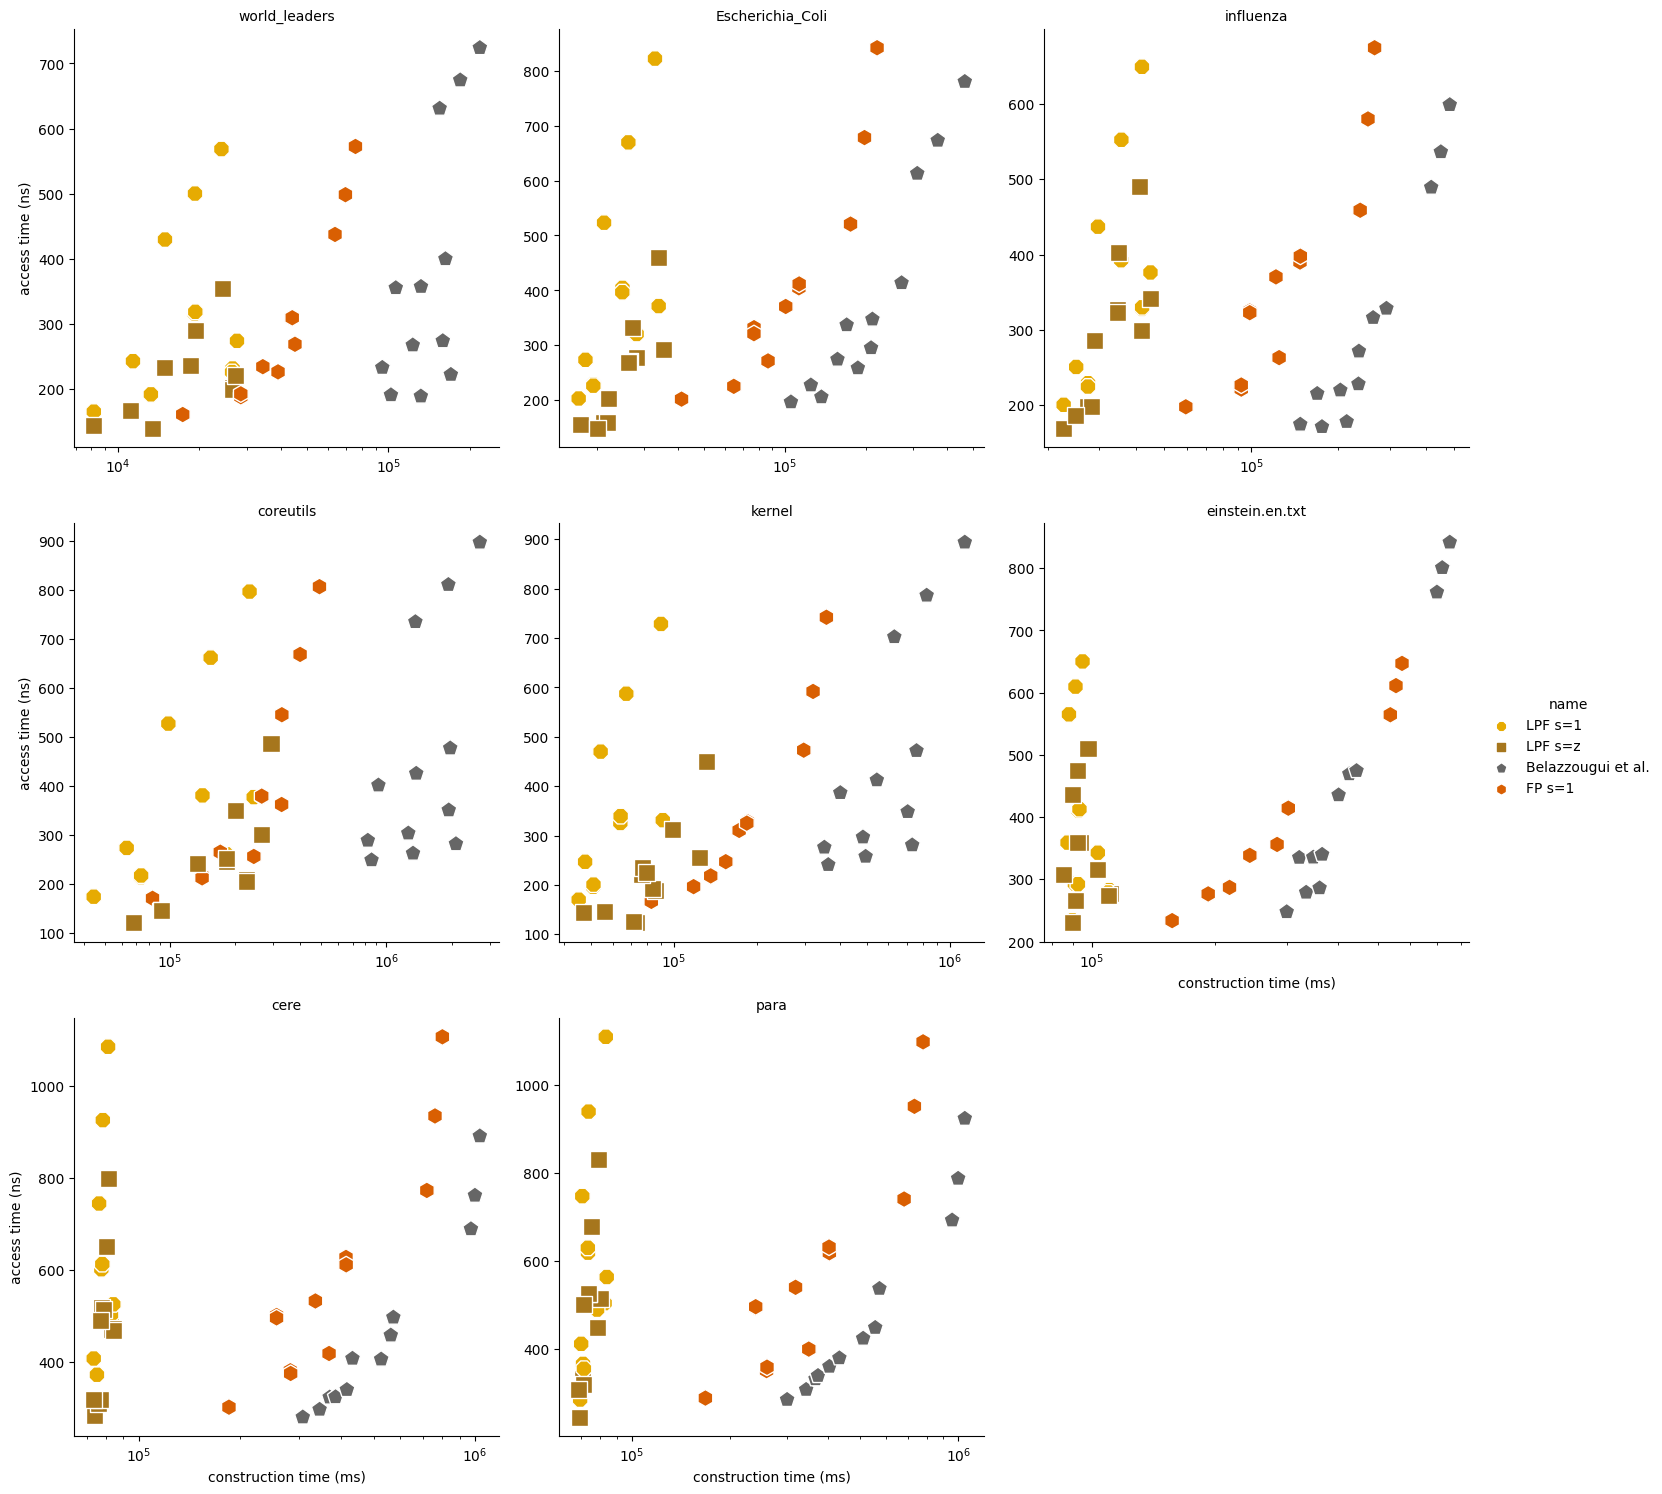

In [15]:
theo_speed_rank_log = sns.relplot(x='constr_time_rs', y='rank_avg', data=theoonly, col='text_id',
                         col_wrap=col_wrapping,palette=pal, hue='name', markers=dfmarkers,style='name', s=150,facet_kws={'sharey': False, 'sharex': False})
theo_speed_rank_log.set_ylabels('access time (ns)')
theo_speed_rank_log.set_xlabels('construction time (ms)')
theo_speed_rank_log.set(xscale="log")
theo_speed_rank_log.set_titles("{col_name}")
plt.savefig("theo_speed_rank_log.pdf")

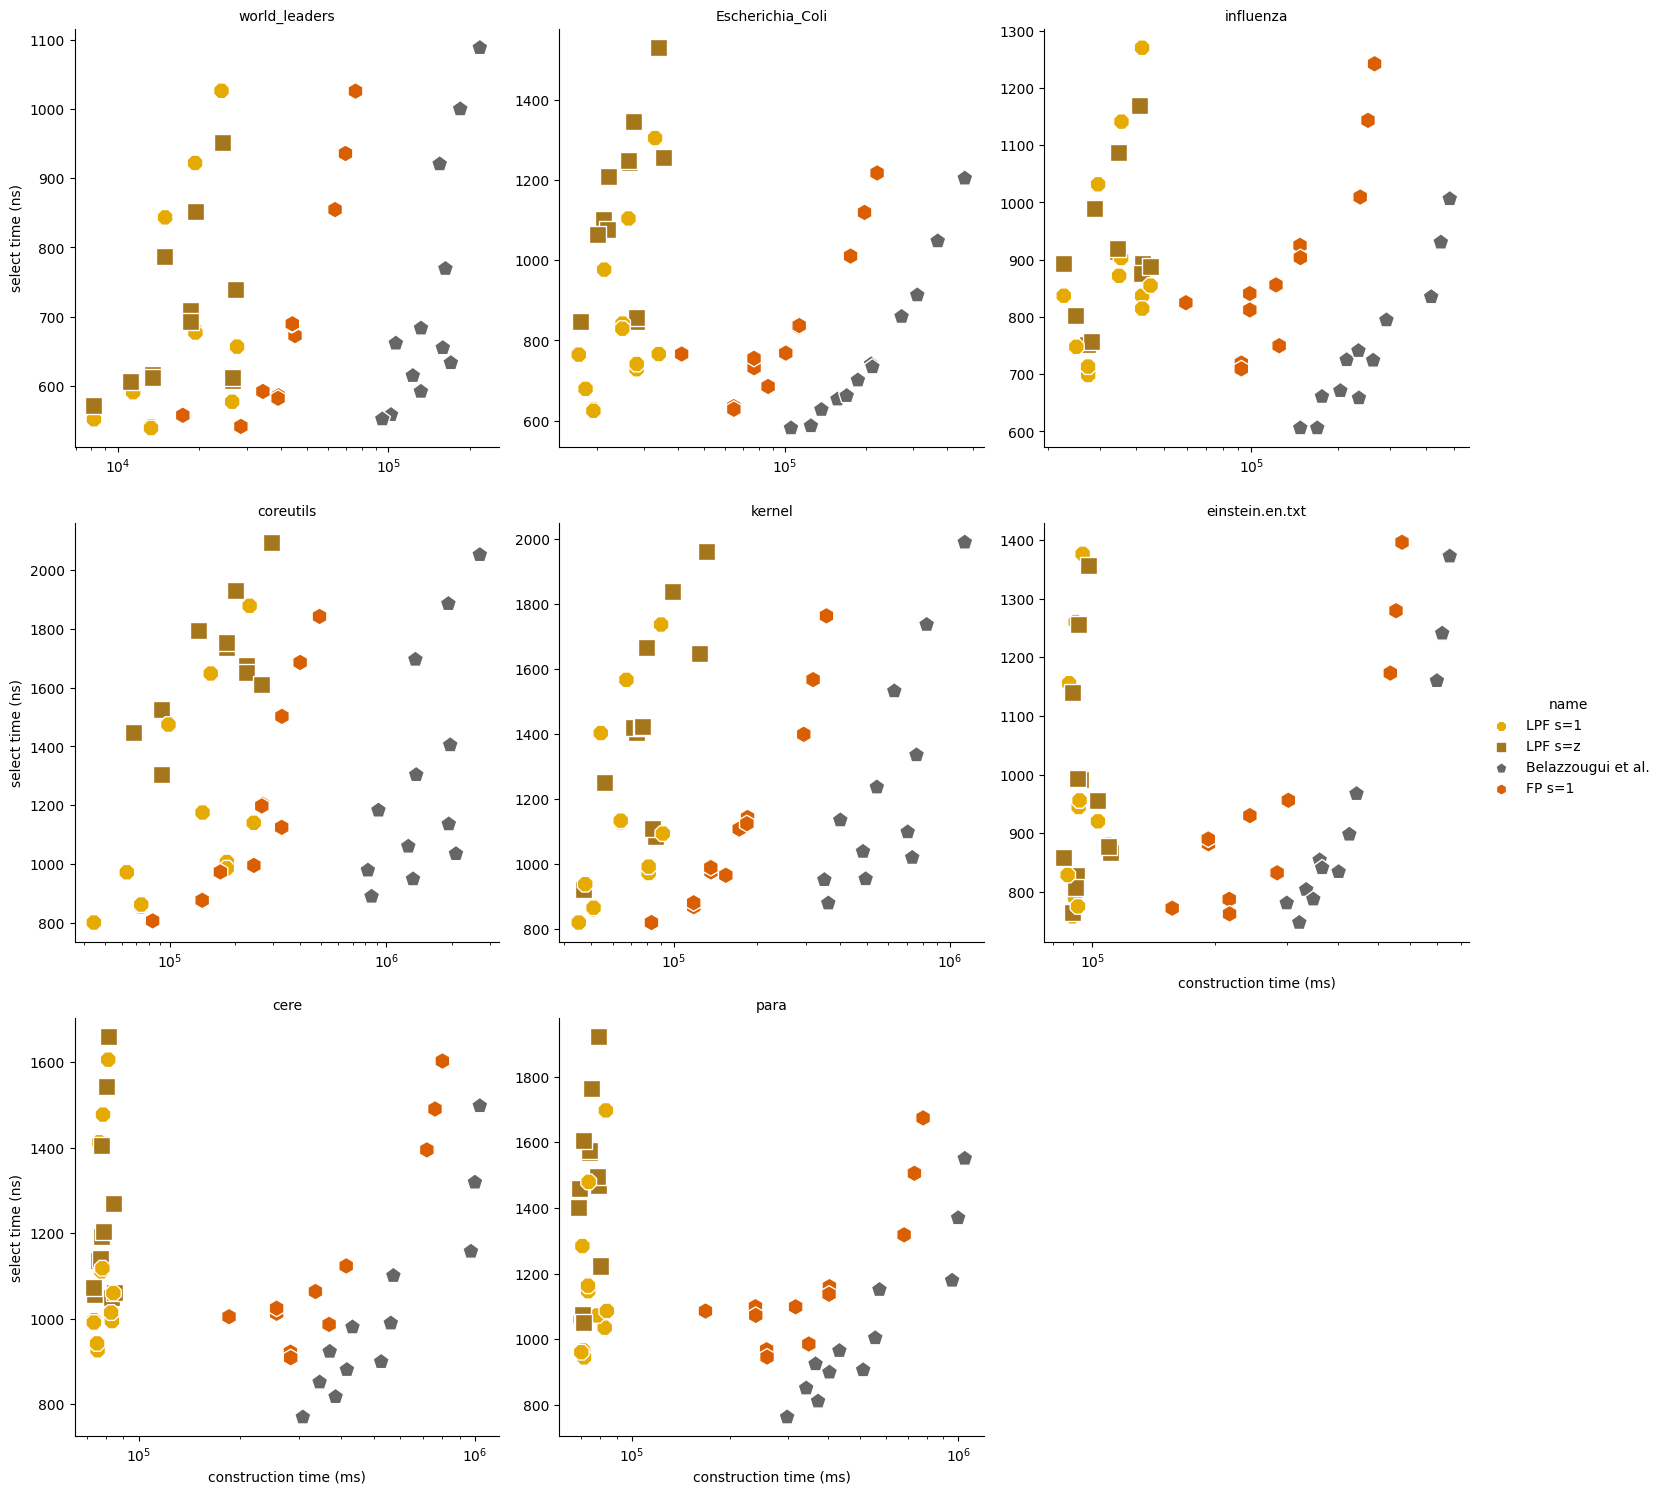

In [16]:
theo_speed_rank_log = sns.relplot(x='constr_time_rs', y='select_avg', data=df[(df.id == 0) |(df.id == 11) | (df.id == 12) | (df.id == 6) | (df.id == 7)], col='text_id',
                         col_wrap=col_wrapping,palette=pal, hue='name', markers=dfmarkers,style='name', s=150,facet_kws={'sharey': False, 'sharex': False})
theo_speed_rank_log.set_ylabels('select time (ns)')
theo_speed_rank_log.set_xlabels('construction time (ms)')
theo_speed_rank_log.set(xscale="log")
theo_speed_rank_log.set_titles("{col_name}")
plt.savefig("theo_speed_select_log.pdf")

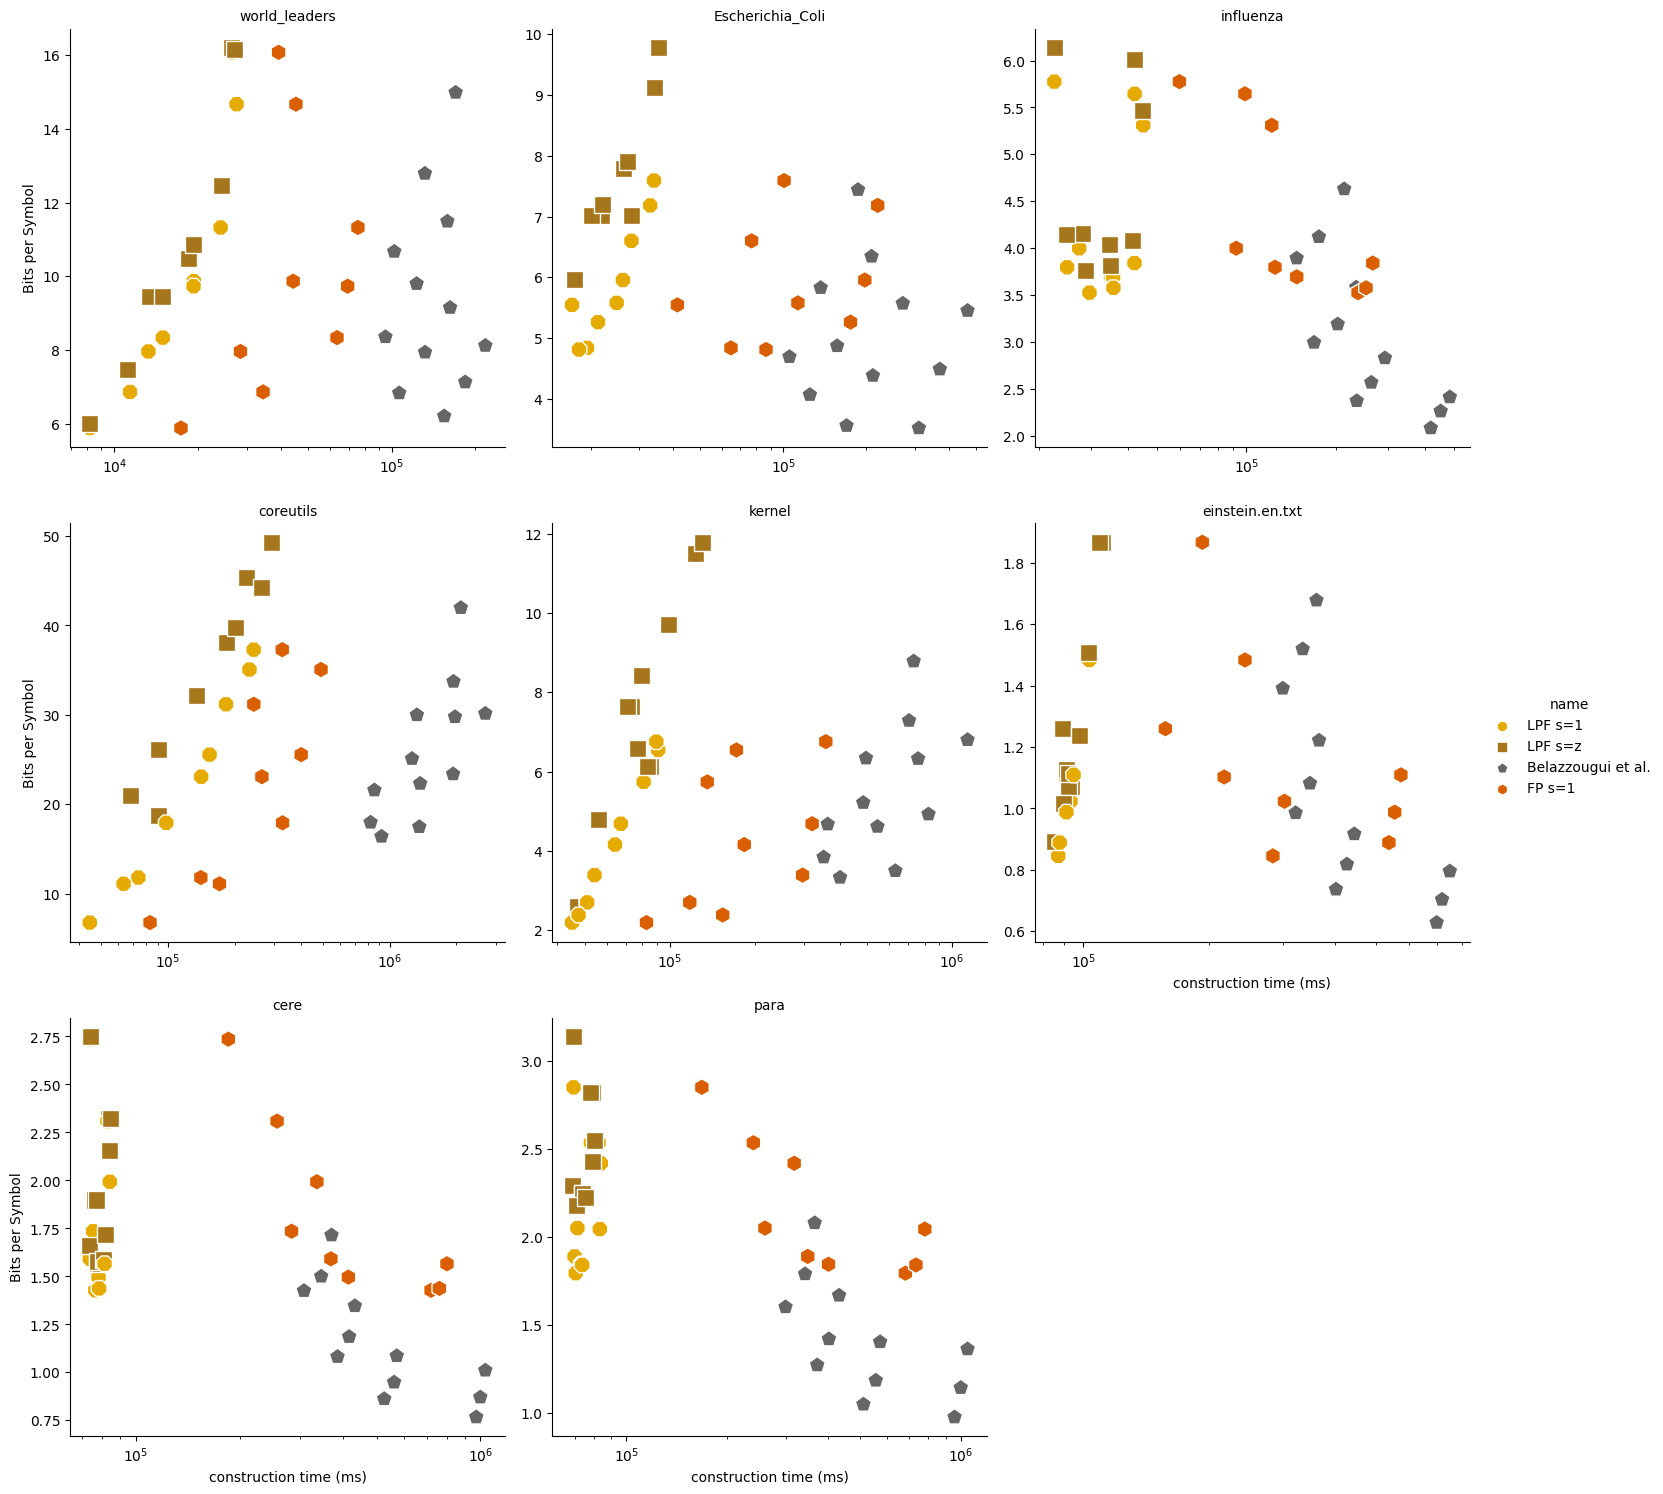

In [17]:
theo_speed_size_log_rs = sns.relplot(x='constr_time_rs', y='bpSrs', data=df[(df.id == 0) |(df.id == 11) | (df.id == 12) | (df.id == 6) | (df.id == 7)], col='text_id',
                         col_wrap=col_wrapping,palette=pal, hue='name', markers=dfmarkers,style='name', s=150,facet_kws={'sharey': False, 'sharex': False})
theo_speed_size_log_rs.set_ylabels('Bits per Symbol')
theo_speed_size_log_rs.set_xlabels('construction time (ms)')
theo_speed_size_log_rs.set(xscale="log")
theo_speed_size_log_rs.set_titles("{col_name}")
plt.savefig("theo_speed_size_log_rs.pdf")

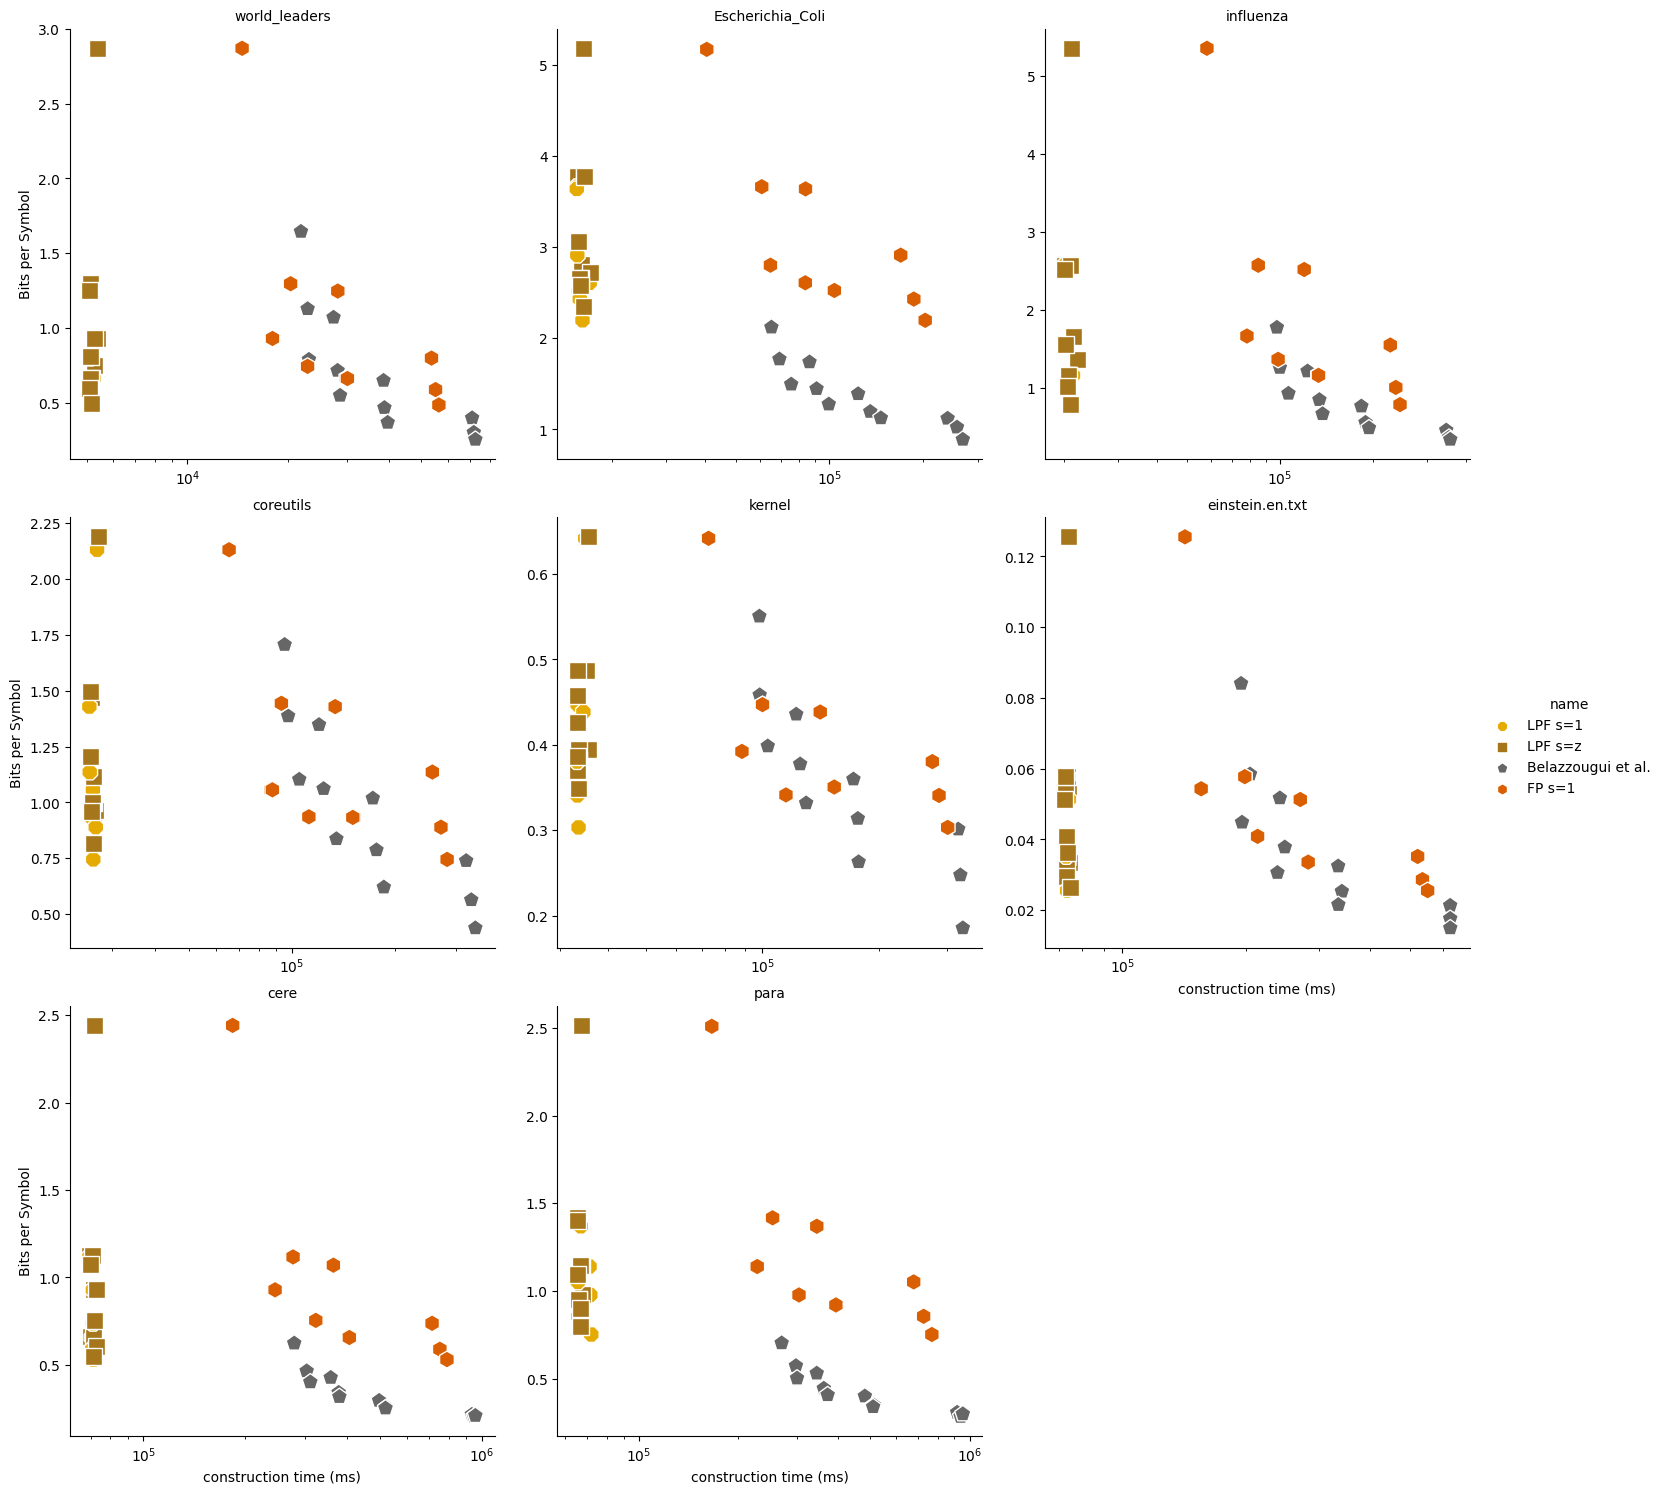

In [18]:
theo_speed_size_log = sns.relplot(x='constr_time', y='bpS', data=df[(df.id == 0) |(df.id == 11) | (df.id == 12) | (df.id == 6) | (df.id == 7)], col='text_id',
                         col_wrap=col_wrapping,palette=pal, hue='name', markers=dfmarkers,style='name', s=150,facet_kws={'sharey': False, 'sharex': False})
theo_speed_size_log.set_ylabels('Bits per Symbol')
theo_speed_size_log.set_xlabels('construction time (ms)')
theo_speed_size_log.set(xscale="log")
theo_speed_size_log.set_titles("{col_name}")
plt.savefig("theo_speed_size_log.pdf")

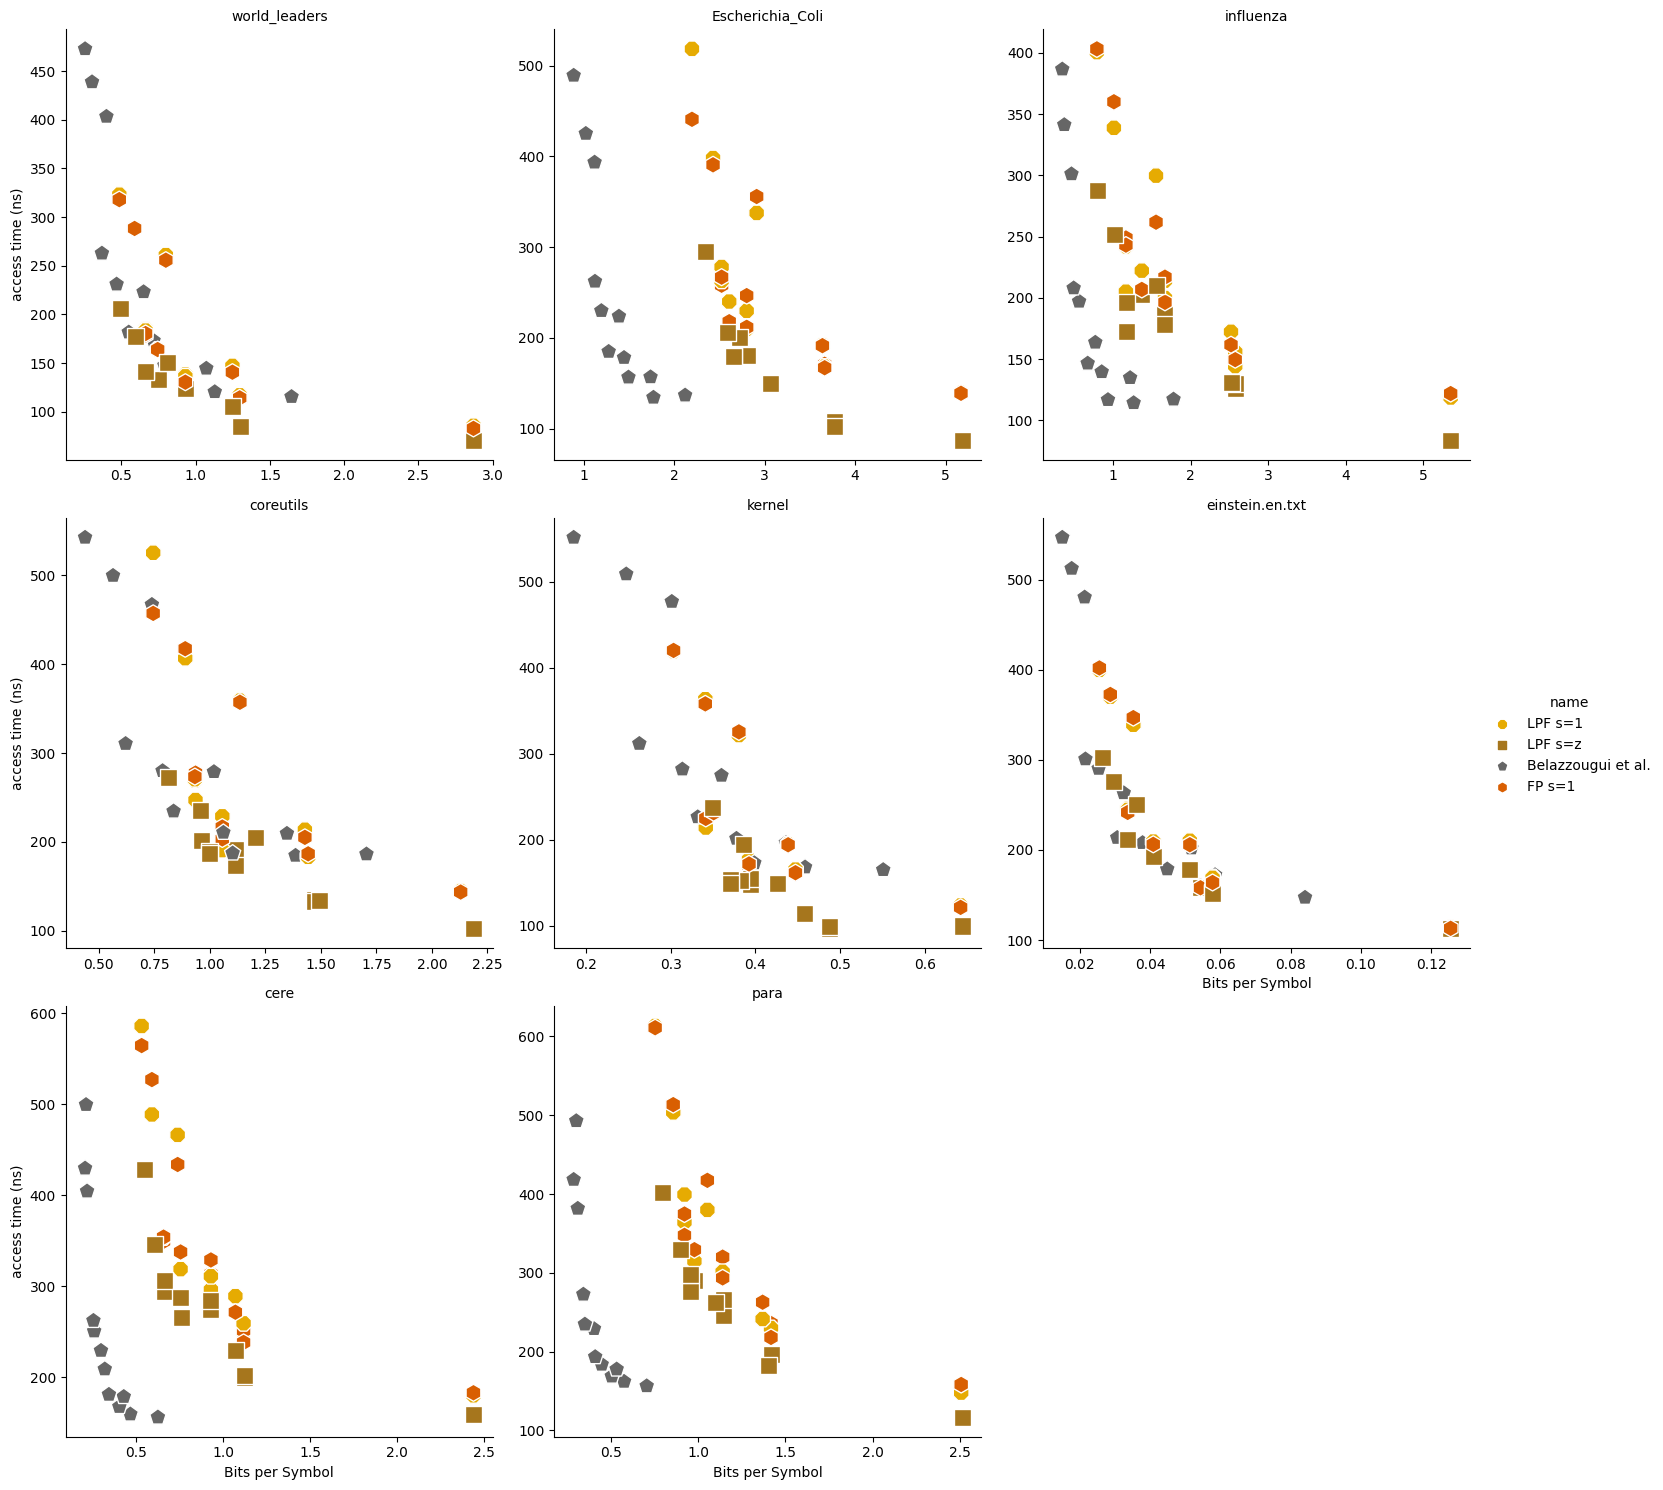

In [19]:
theo_size_access = sns.relplot(x='bpS', y='access_avg', data=df[(df.id == 0) |(df.id == 11) | (df.id == 12) | (df.id == 6) | (df.id == 7)], col='text_id',
                         col_wrap=col_wrapping,palette=pal, hue='name', markers=dfmarkers,style='name', s=150,facet_kws={'sharey': False, 'sharex': False})
theo_size_access.set_ylabels('access time (ns)')
theo_size_access.set_xlabels('Bits per Symbol')
theo_size_access.set_titles("{col_name}")
plt.savefig("theo_size_access.pdf")

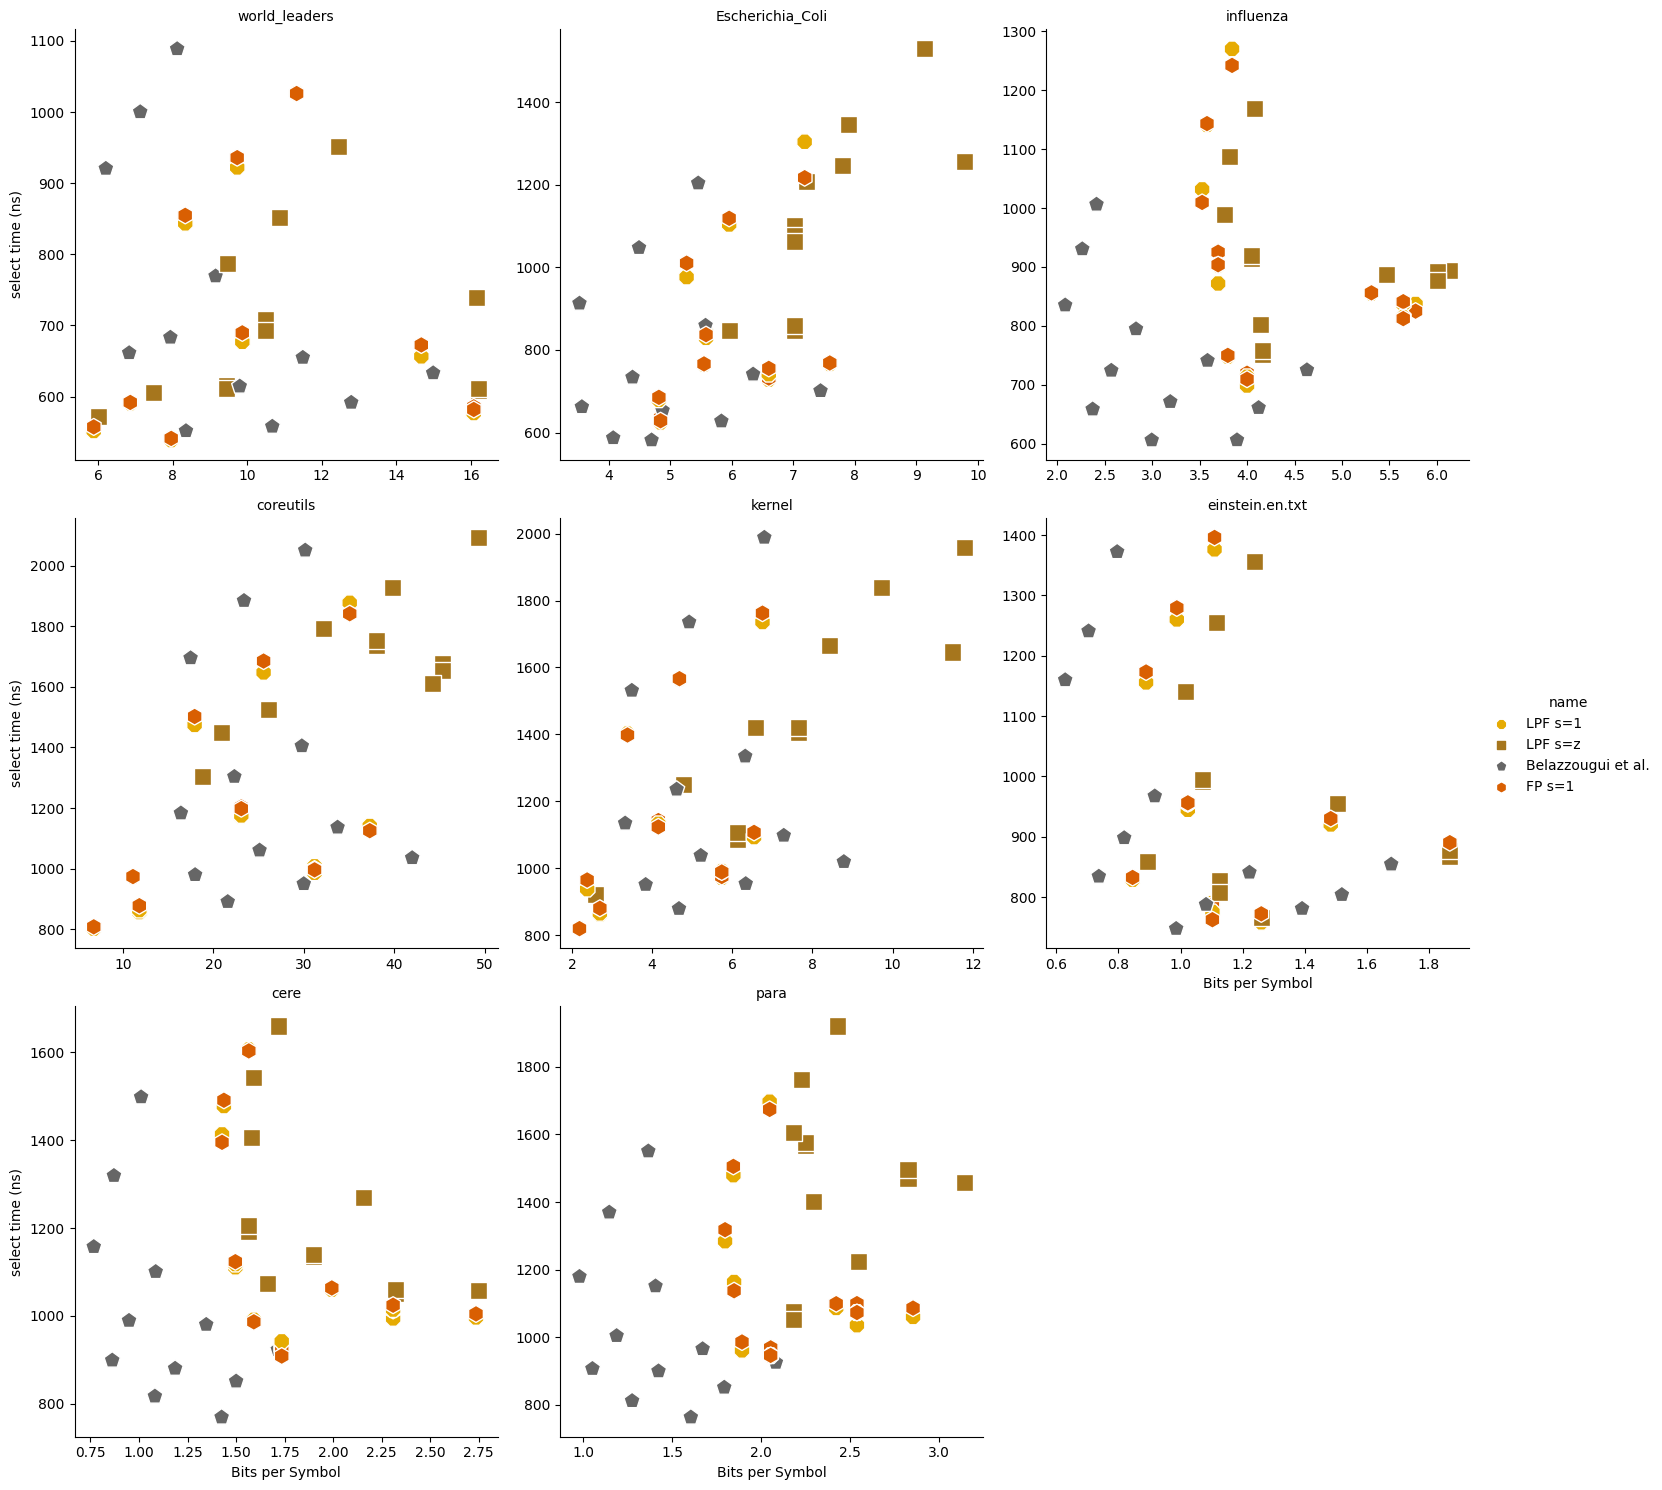

In [20]:
theo_size_access = sns.relplot(x='bpSrs', y='select_avg', data=df[(df.id == 0) |(df.id == 11) | (df.id == 12) | (df.id == 6) | (df.id == 7)], col='text_id',
                         col_wrap=col_wrapping,palette=pal, hue='name', markers=dfmarkers,style='name', s=150,facet_kws={'sharey': False, 'sharex': False})
theo_size_access.set_ylabels('select time (ns)')
theo_size_access.set_xlabels('Bits per Symbol')
theo_size_access.set_titles("{col_name}")
plt.savefig("theo_size_select.pdf")

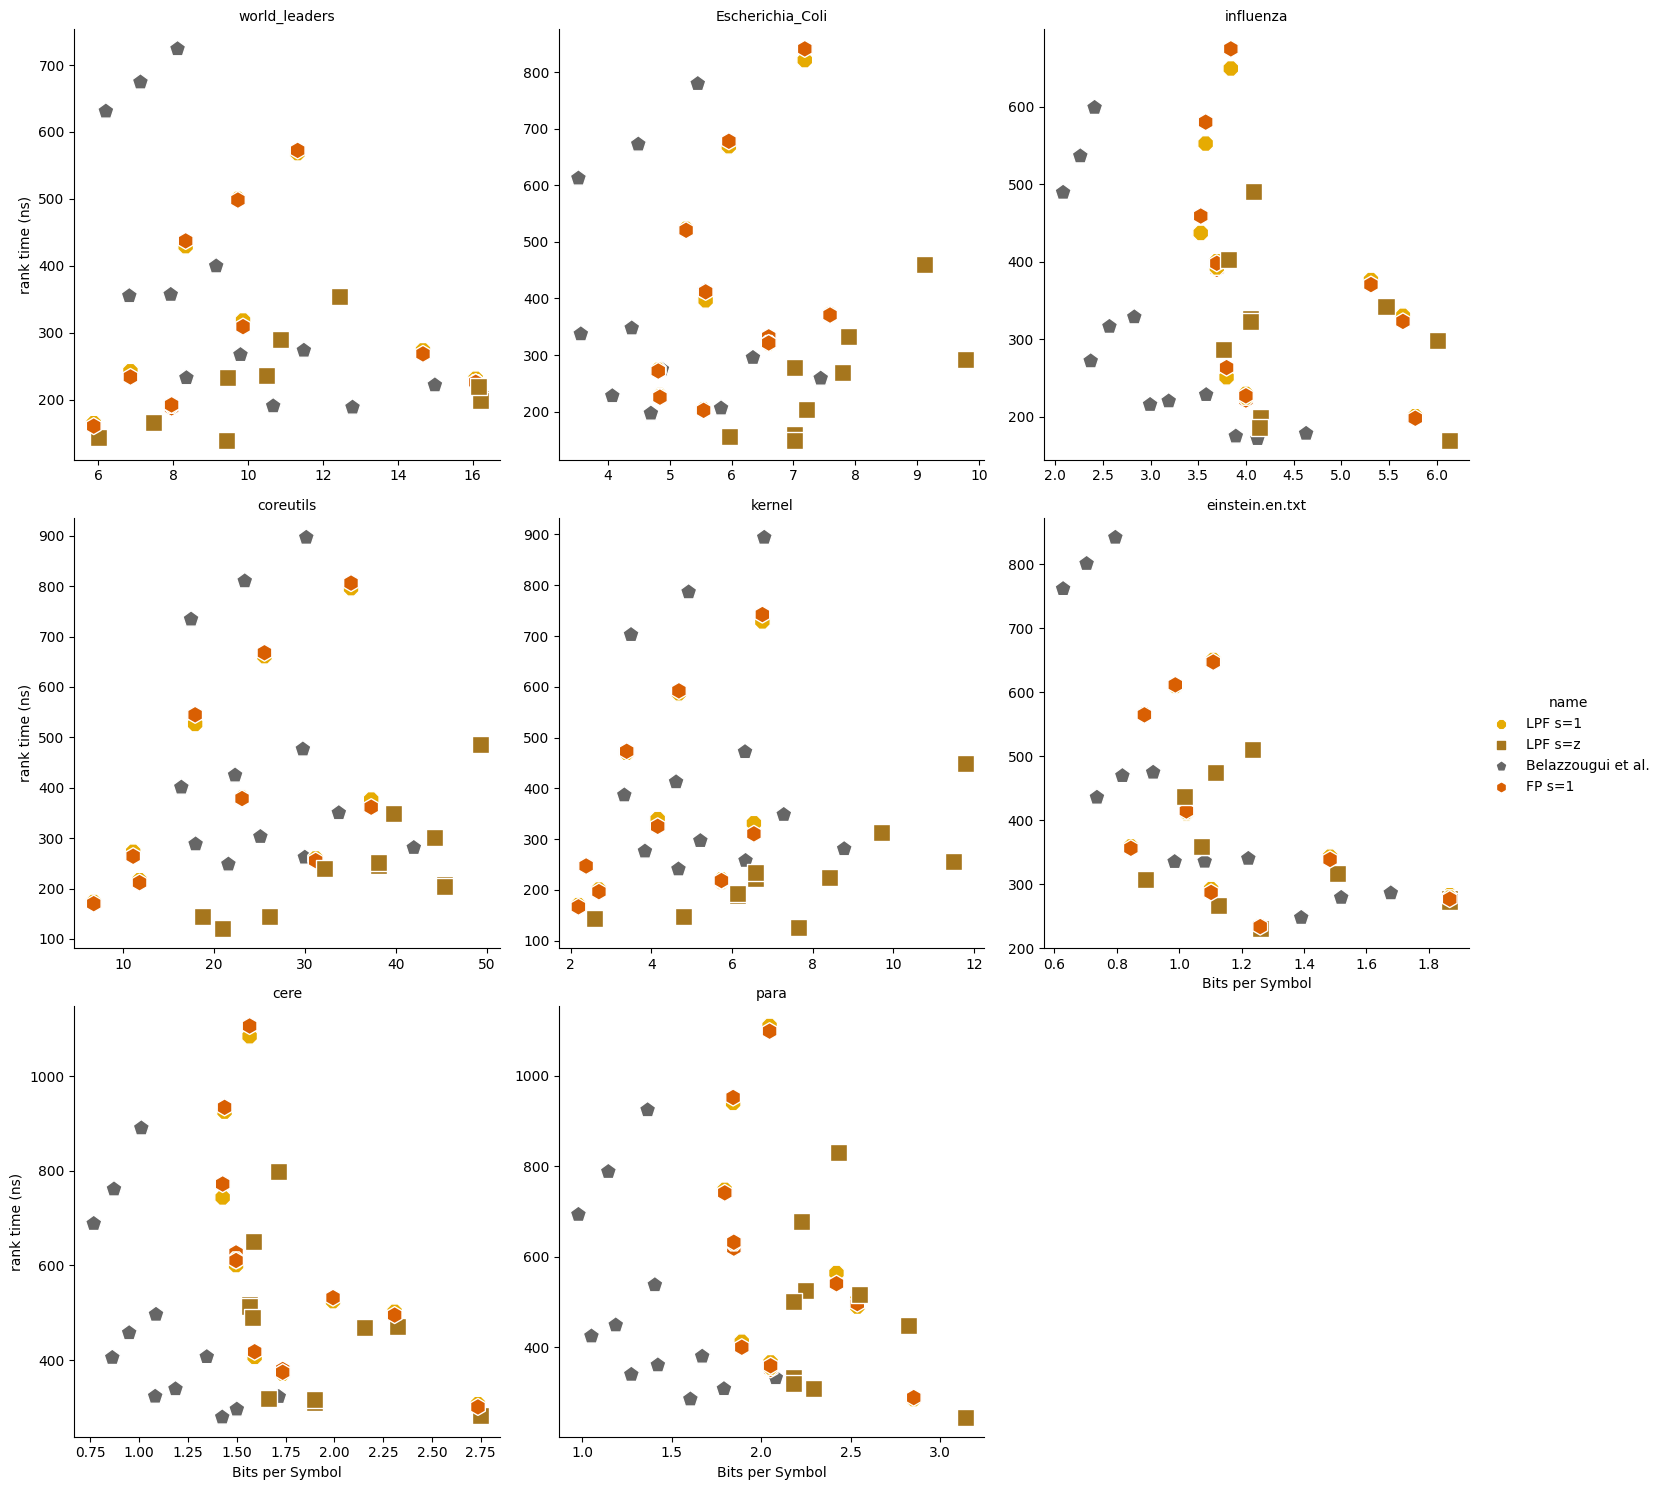

In [21]:
theo_size_access = sns.relplot(x='bpSrs', y='rank_avg', data=df[(df.id == 0) |(df.id == 11) | (df.id == 12) | (df.id == 6) | (df.id == 7)], col='text_id',
                         col_wrap=col_wrapping,palette=pal, hue='name', markers=dfmarkers,style='name', s=150,facet_kws={'sharey': False, 'sharex': False})
theo_size_access.set_ylabels('rank time (ns)')
theo_size_access.set_xlabels('Bits per Symbol')
theo_size_access.set_titles("{col_name}")
plt.savefig("theo_size_rank.pdf")

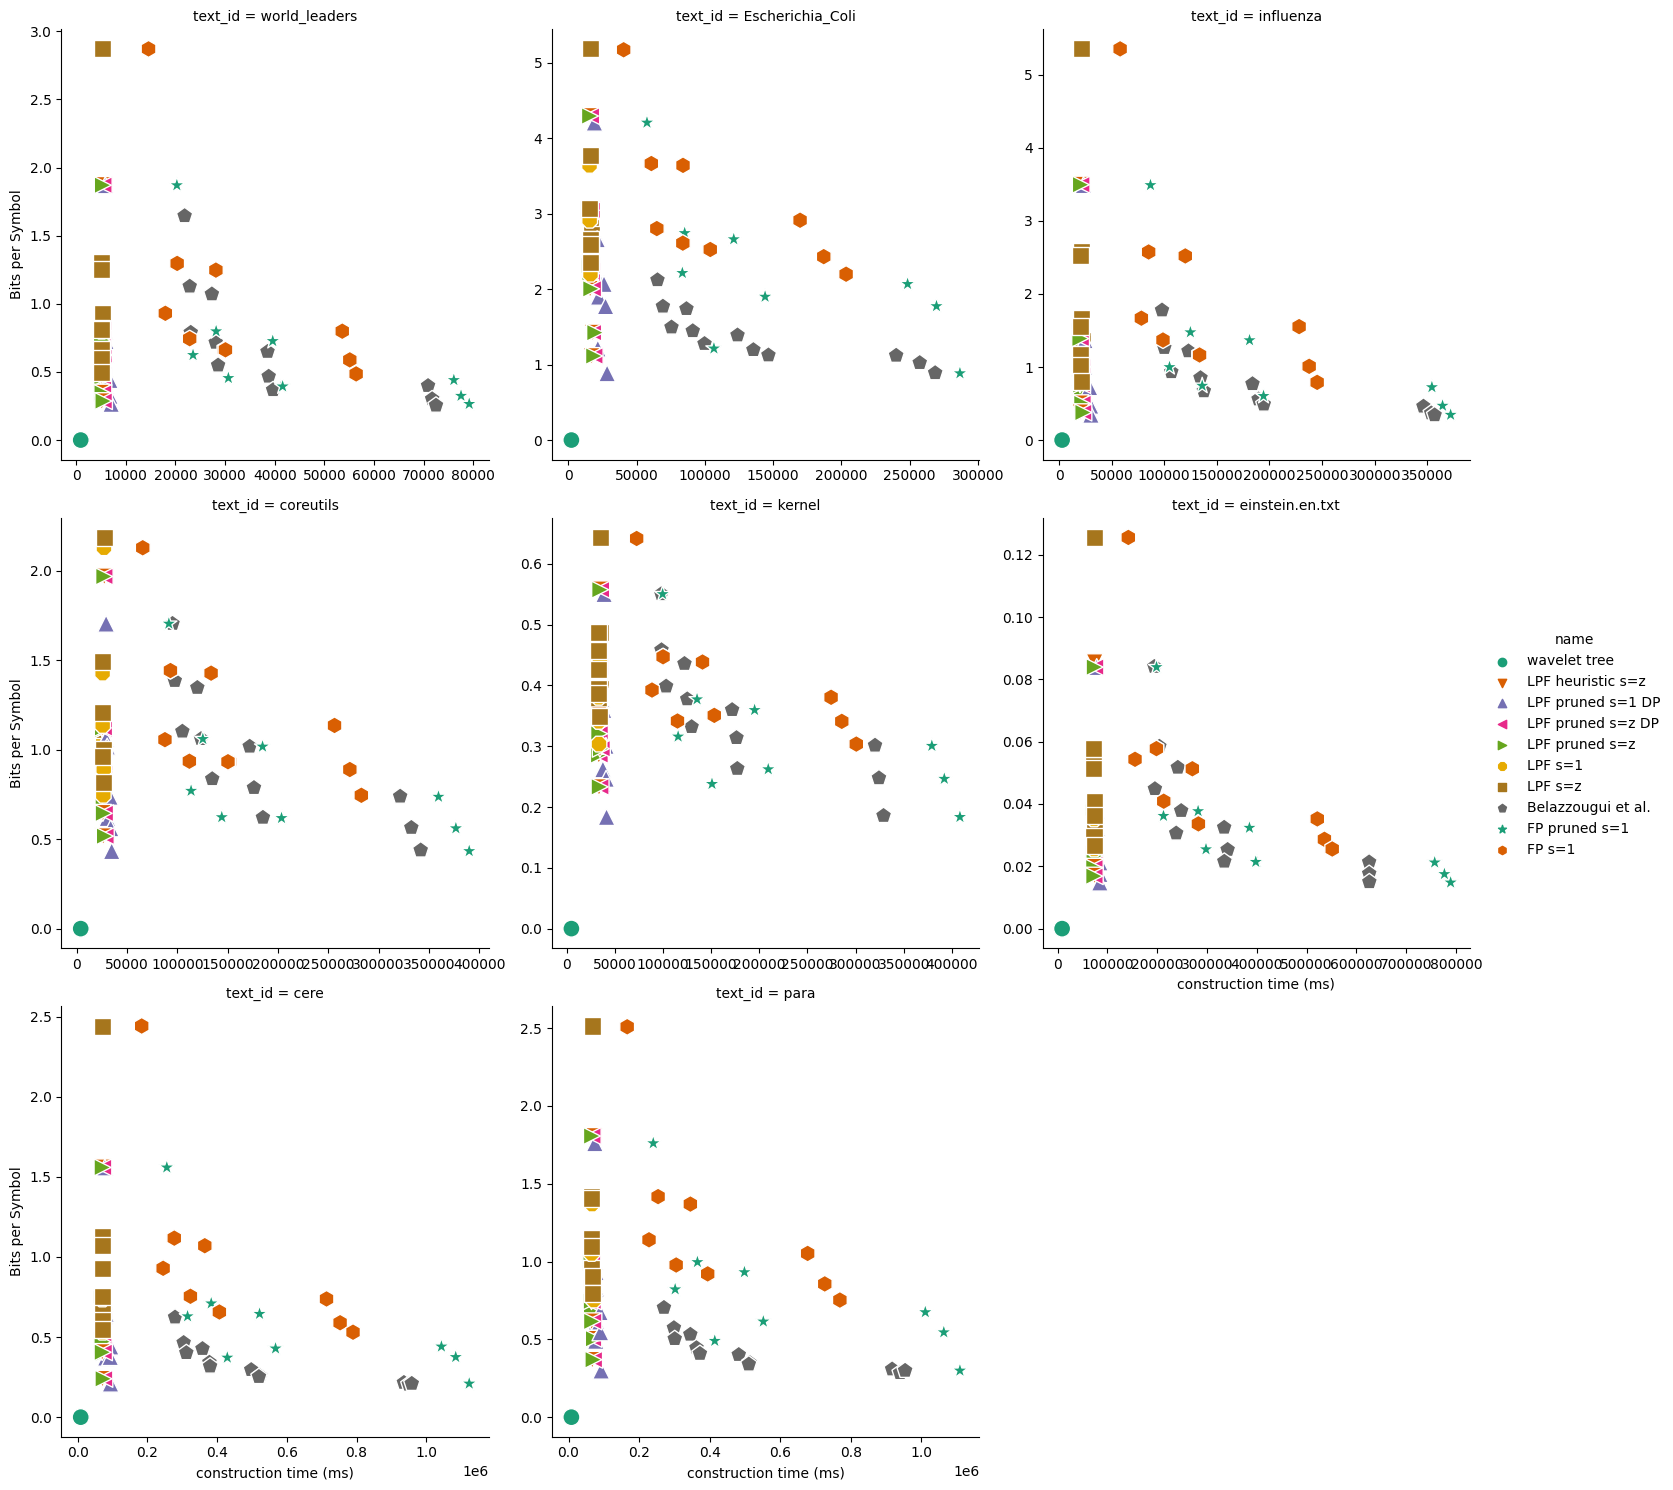

In [22]:
speed_size = sns.relplot(x='constr_time', y='bpS', data=df, col='text_id',
    col_wrap=col_wrapping,palette=pal, hue='name', markers=dfmarkers,style='name', s=150,facet_kws={'sharey': False, 'sharex': False})
speed_size.set_ylabels('Bits per Symbol')
speed_size.set_xlabels('construction time (ms)')


In [23]:
# df_new = df.copy()
# sns.heatmap(df_new.corr())

In [24]:
# df
# def draw_heatmap(*args, **kwargs):
#     data = kwargs.pop('data')
#     d = data.pivot(index=args[1], columns=args[0], values=args[2])
#     sns.heatmap(d, **kwargs)
# fg = sns.FacetGrid(df_new, col='text_id', row='id')
# fg.map_dataframe(draw_heatmap, 't', 'l', 'constr_time', cbar=False, square = False)

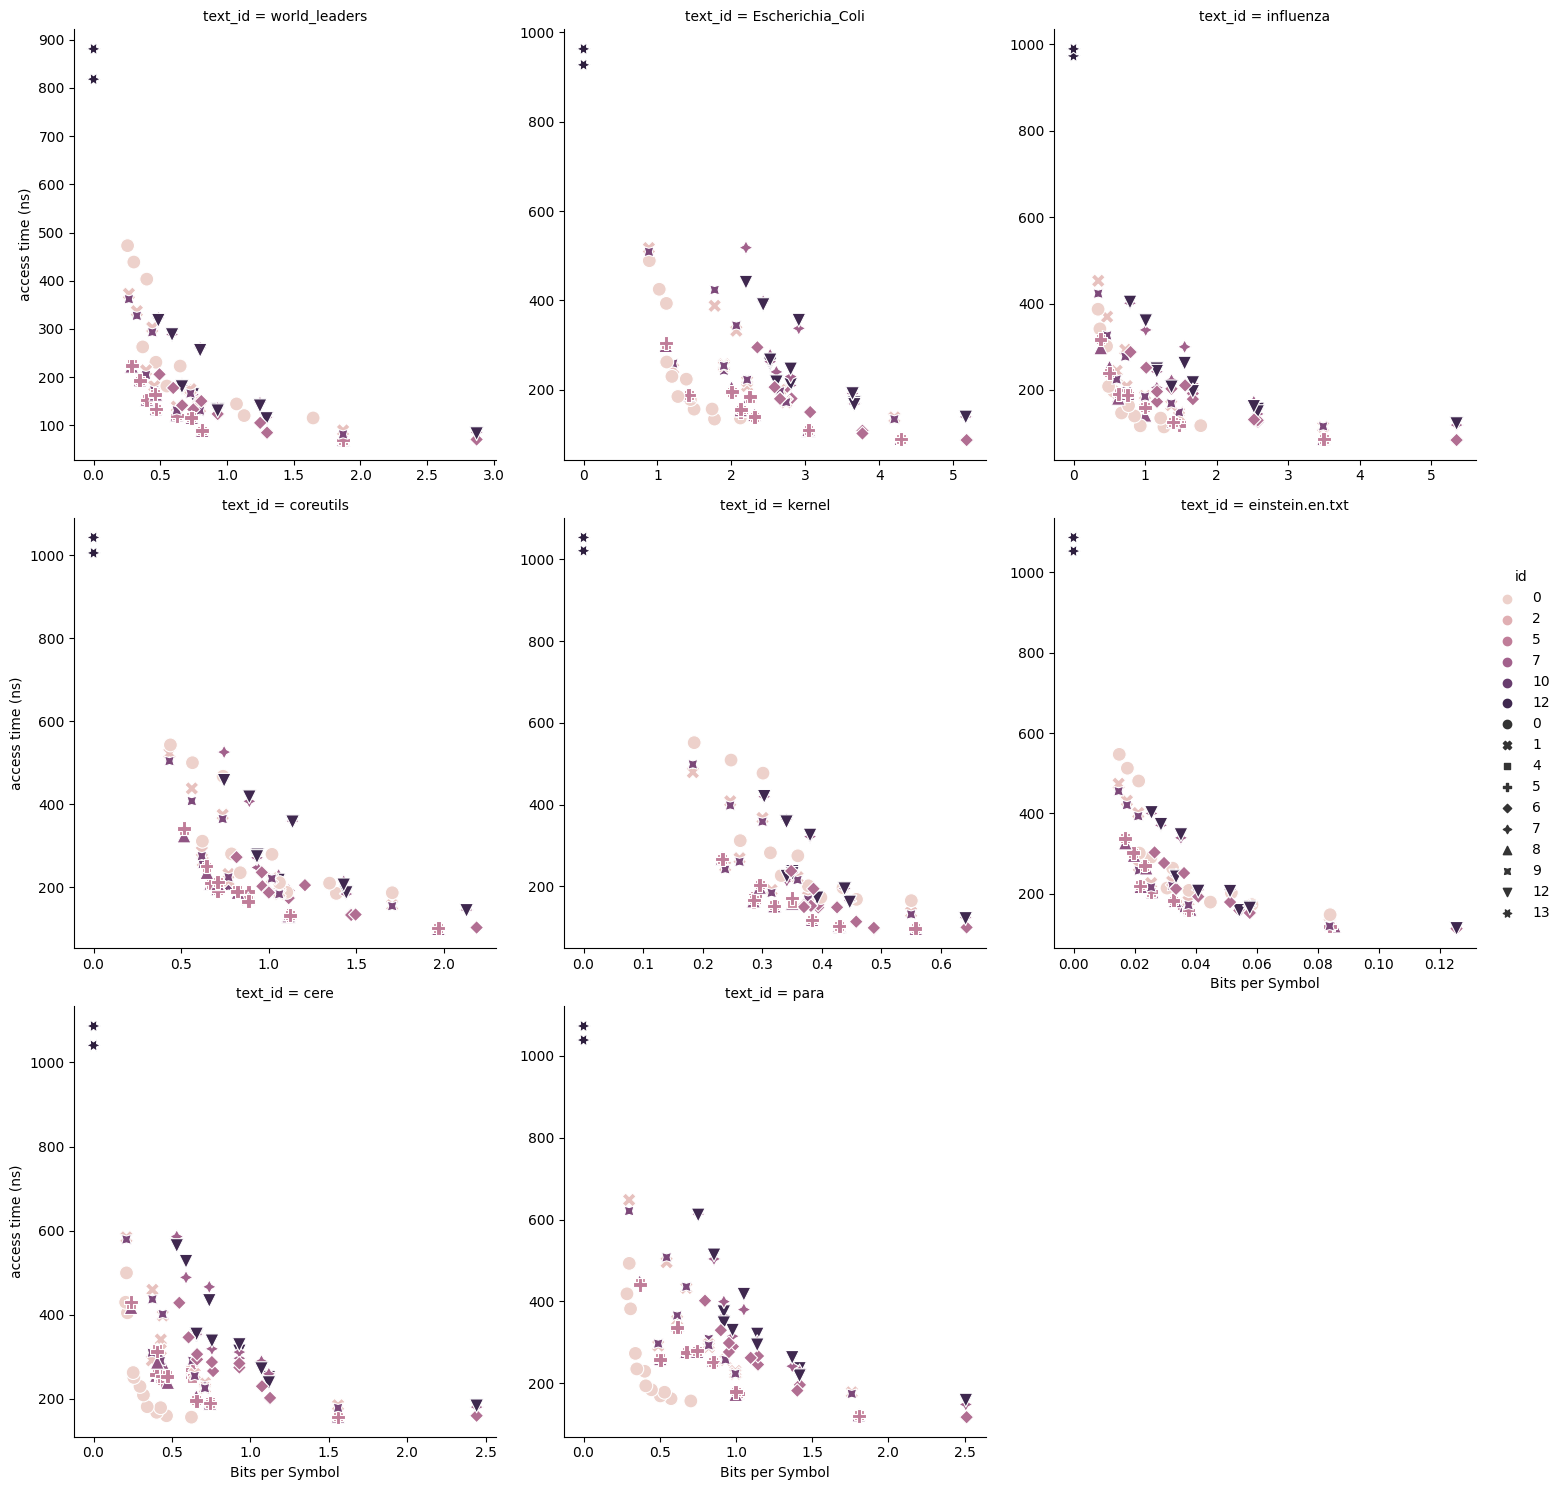

In [25]:
que_size = sns.relplot(x='bpS', y='access_avg', data=df, col='text_id', col_wrap=3, hue="id",
                       style="id", s=100,facet_kws={'sharey': False, 'sharex': False})
que_size.set_ylabels('access time (ns)')
que_size.set_xlabels('Bits per Symbol')

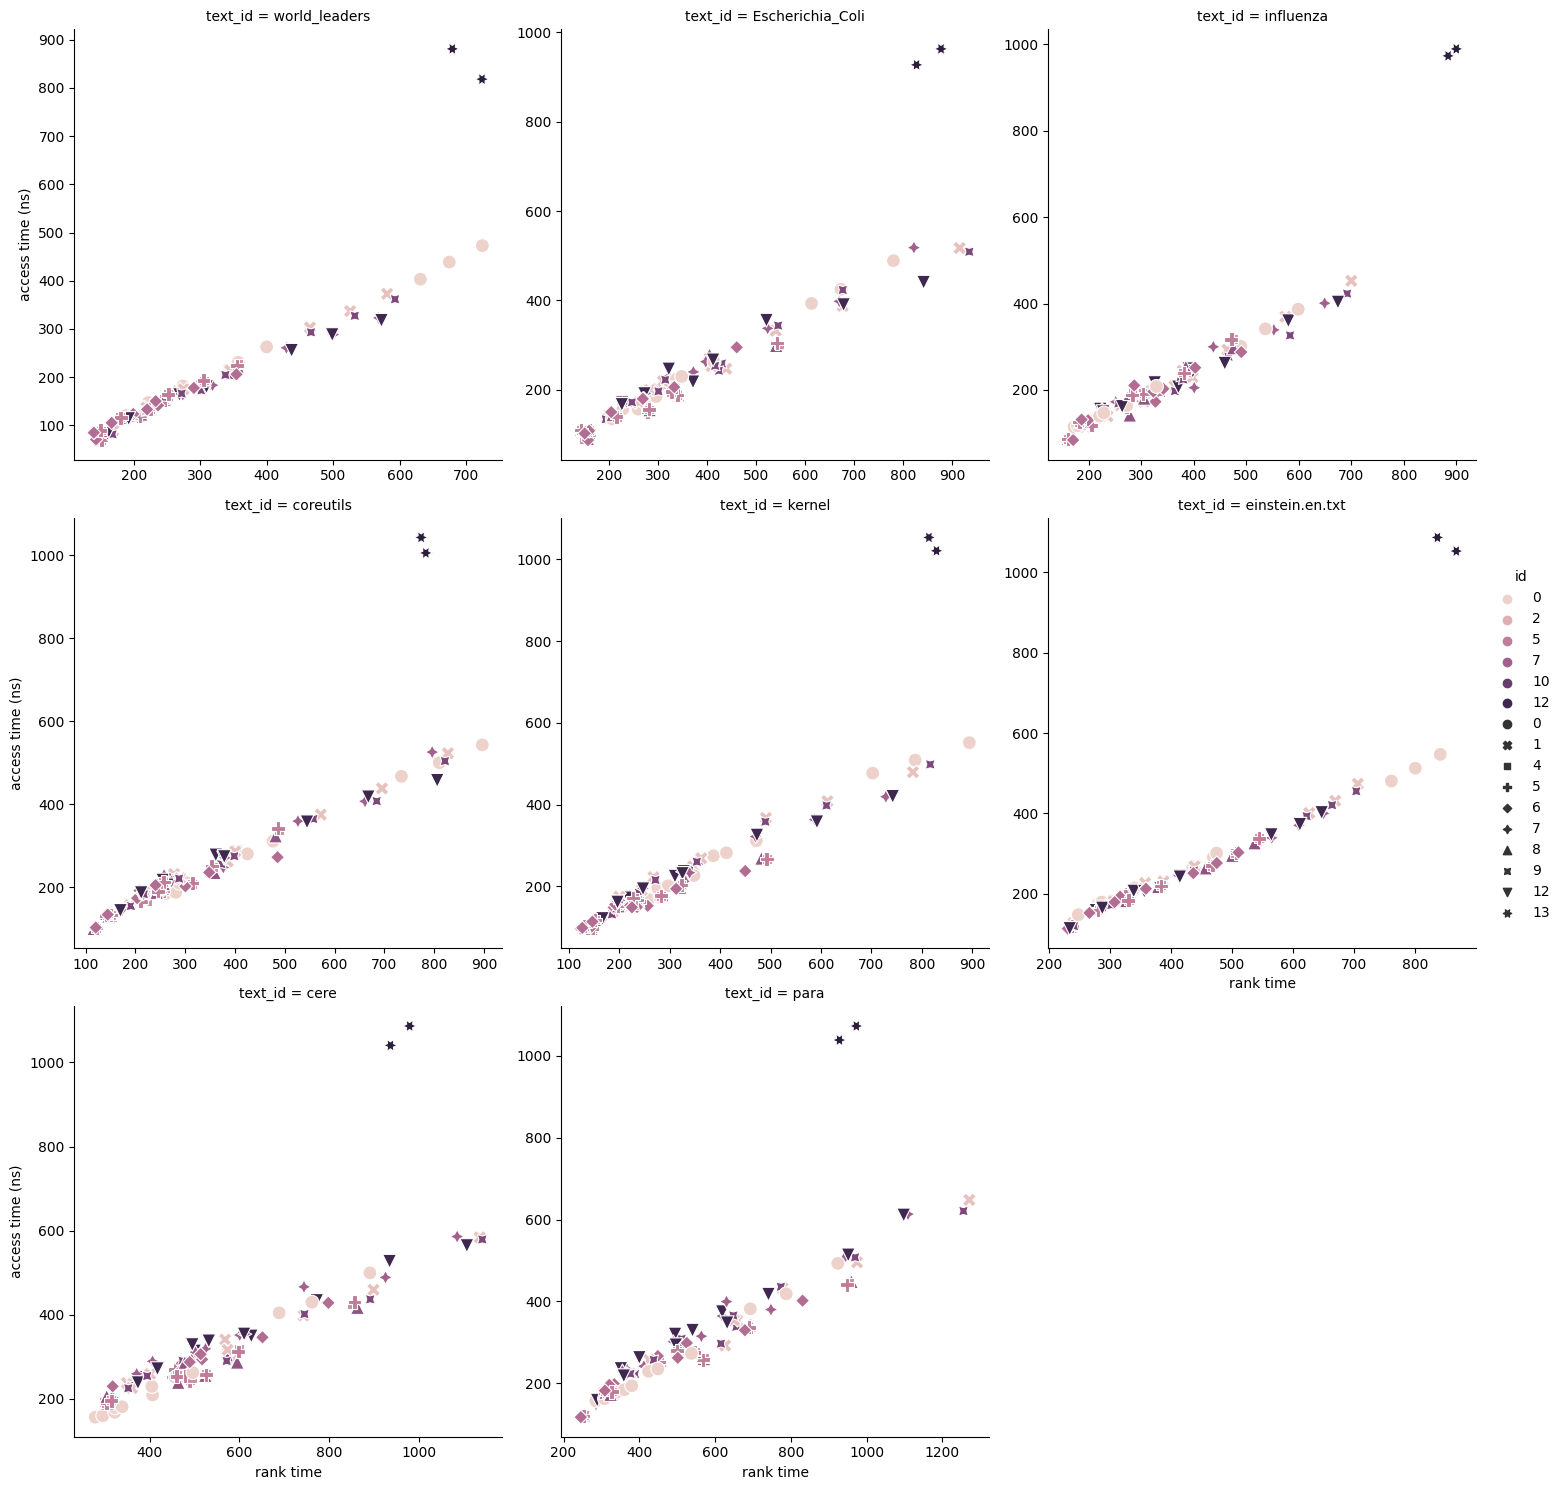

In [26]:
que_size = sns.relplot(x='rank_avg', y='access_avg', data=df, col='text_id', col_wrap=3, hue="id",
                       style="id", s=100,facet_kws={'sharey': False, 'sharex': False})
que_size.set_ylabels('access time (ns)')
que_size.set_xlabels('rank time')

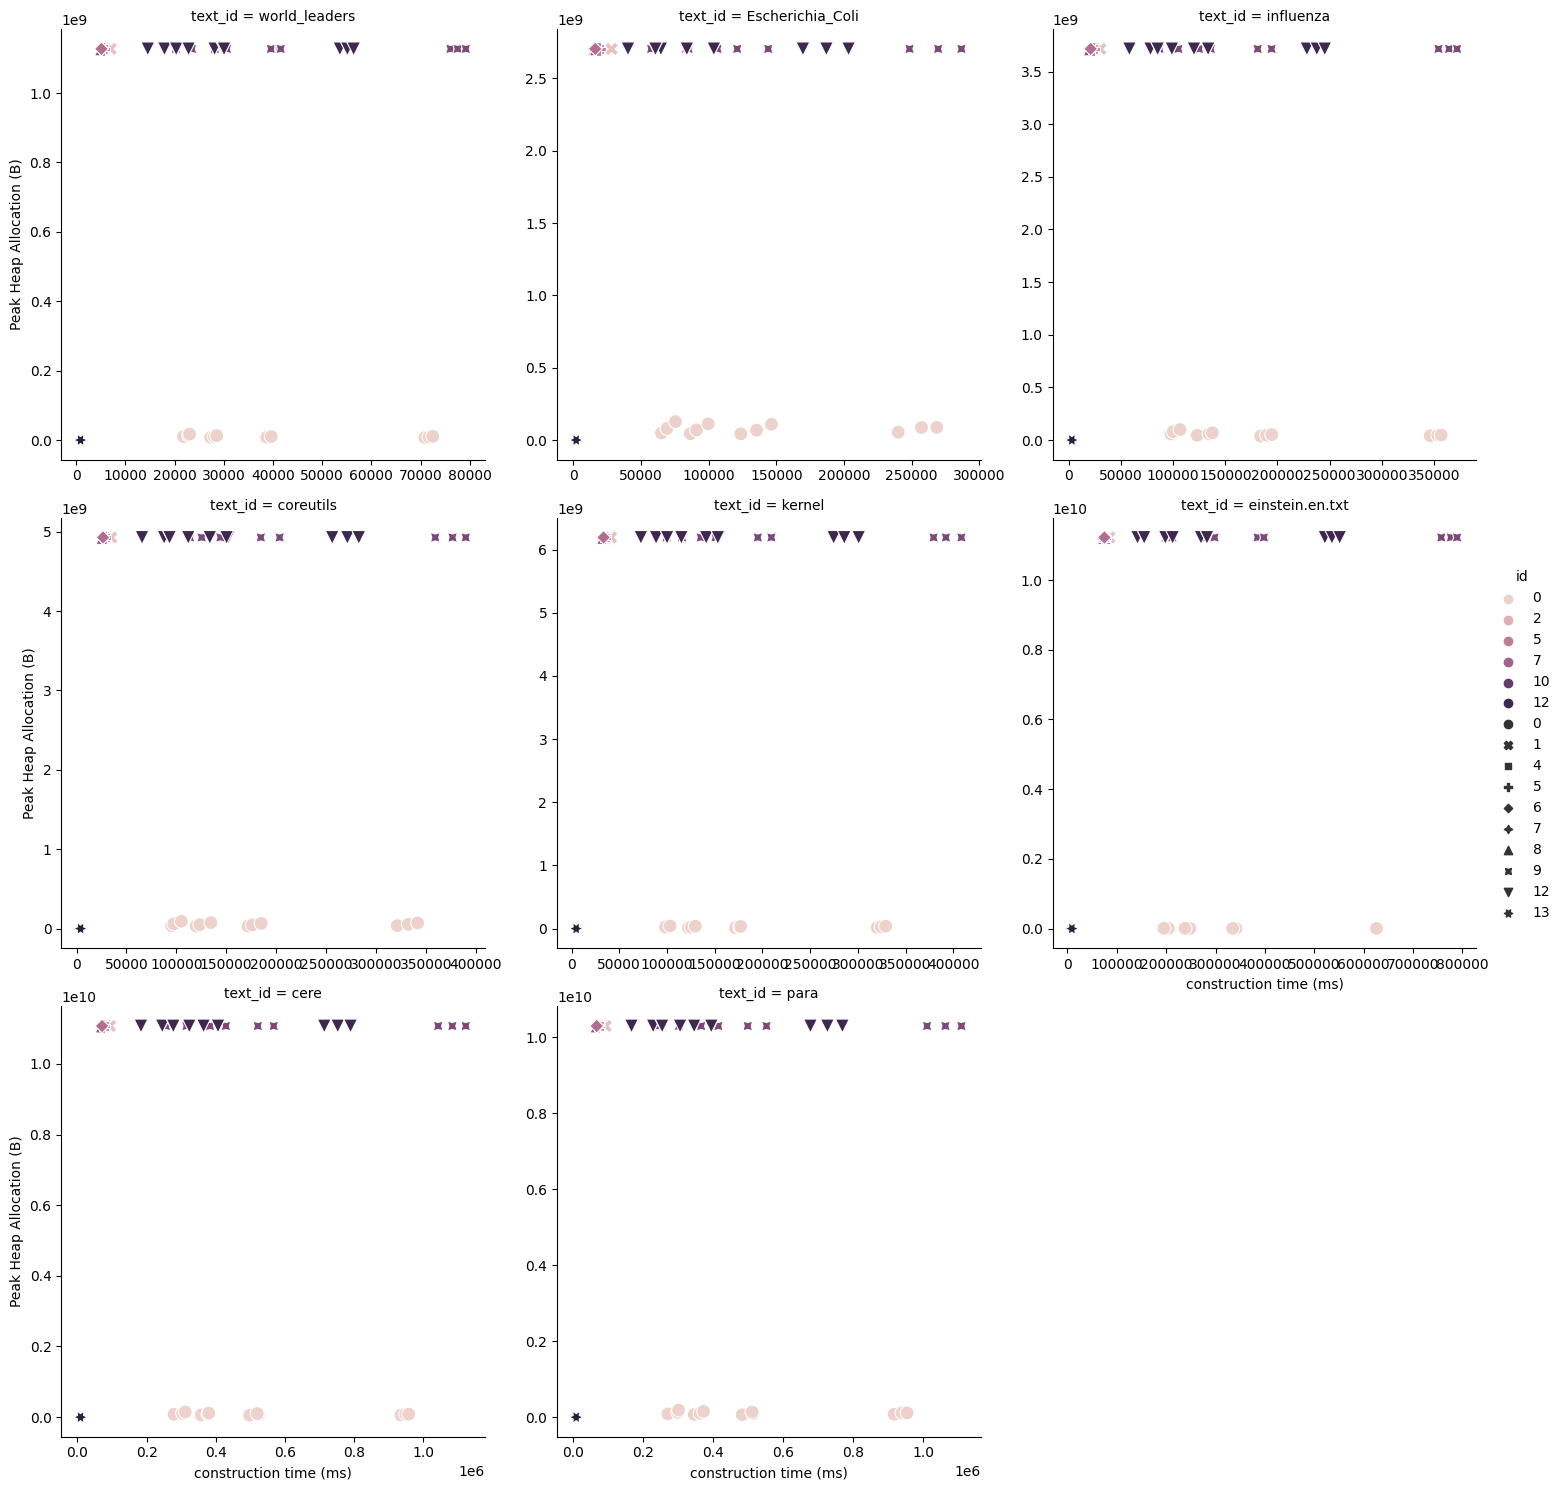

In [27]:

size_size = sns.relplot(x='constr_time', y='peak_mem', data=df, col='text_id', col_wrap=3,
                        hue="id", style="id", s=100,facet_kws={'sharey': False, 'sharex': False})
size_size.set_ylabels('Peak Heap Allocation (B)')
size_size.set_xlabels('construction time (ms)')


NameError: name 'speed_size_log' is not defined

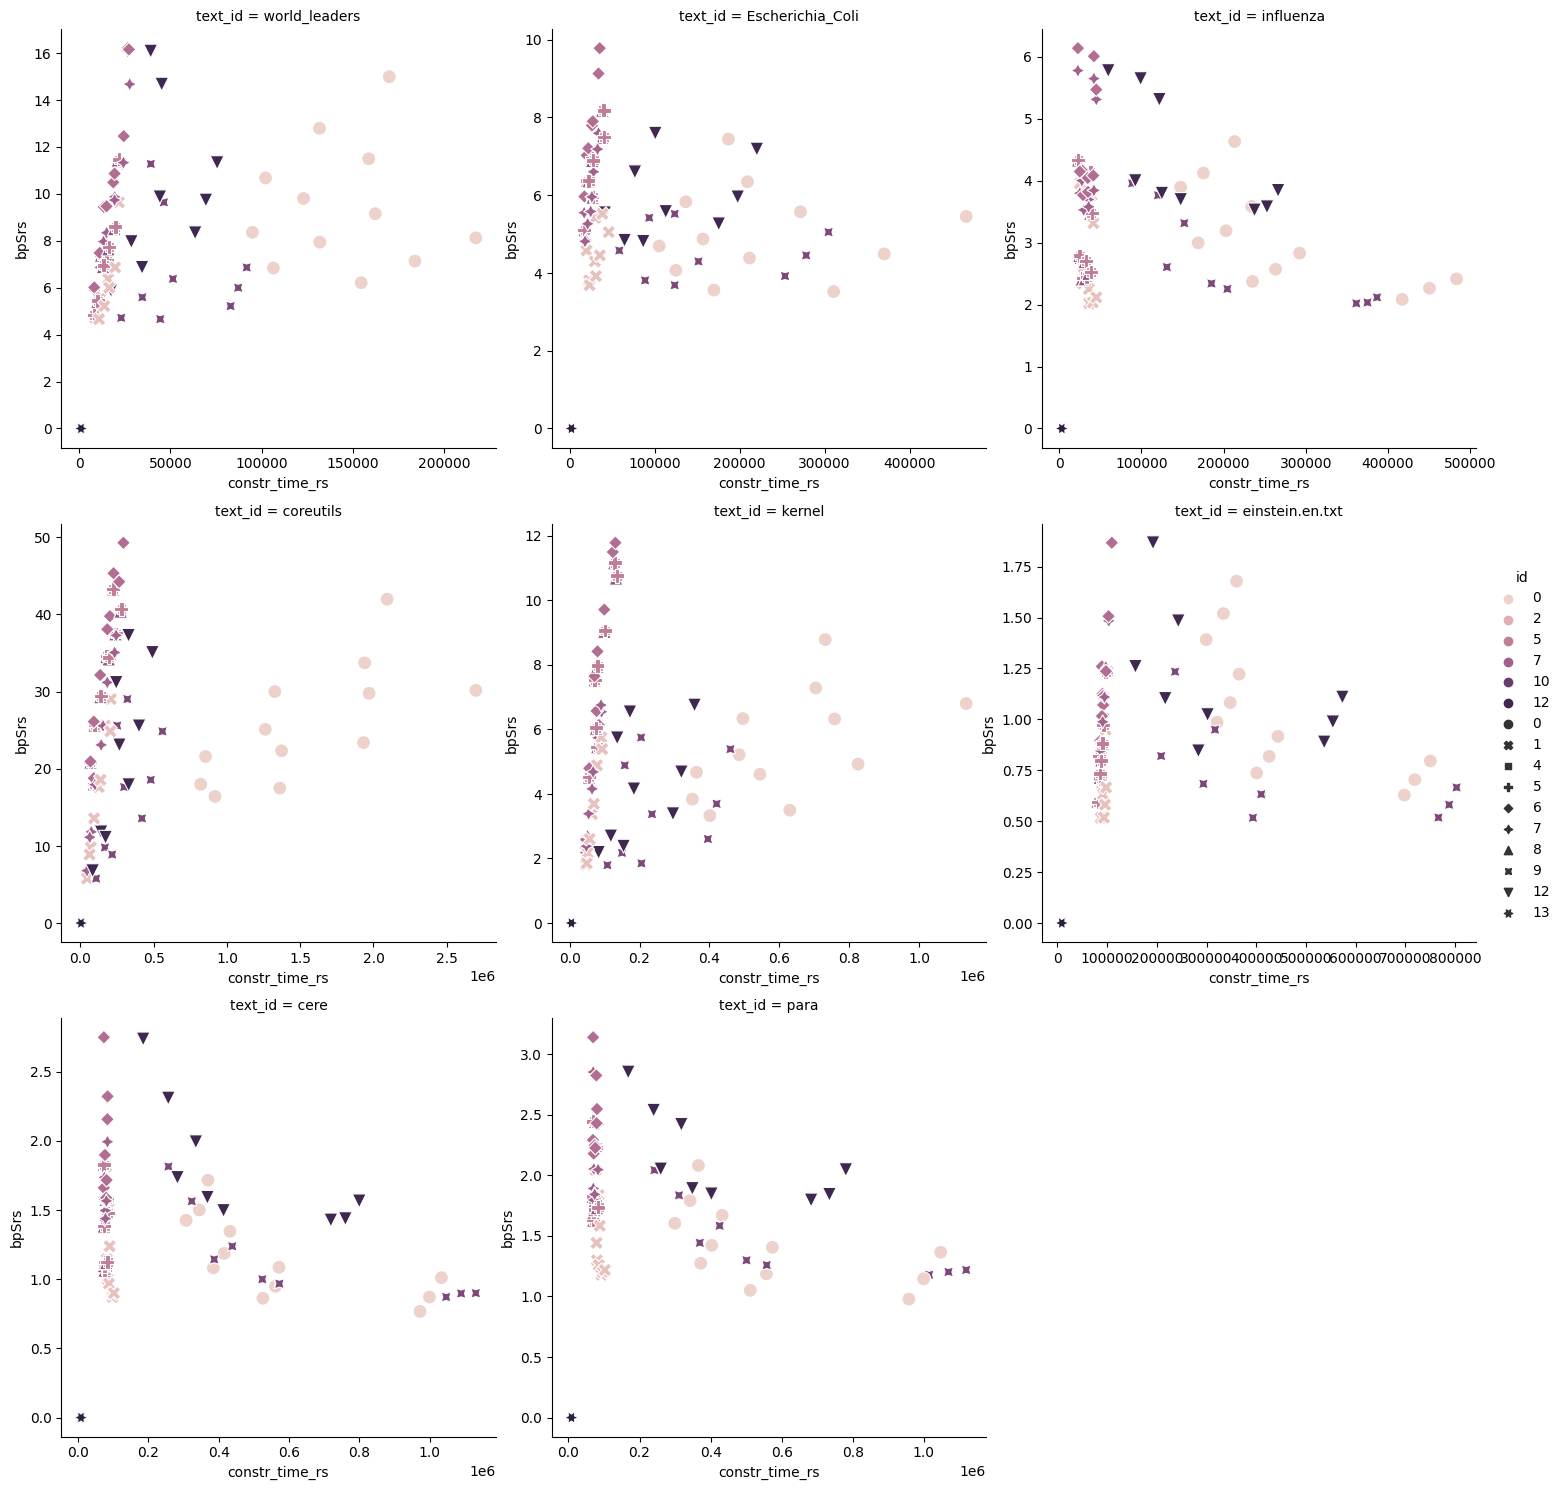

In [28]:
size_size = sns.relplot(x='constr_time_rs', y='bpSrs', data=df, col='text_id', col_wrap=3,
                        hue="id", style="id", s=100,facet_kws={'sharey': False, 'sharex': False})
speed_size_log.set_ylabels('Bits per Symbol (includes rank)')
speed_size_log.set_xlabels('construction time (ms)')
speed_size_log.set(xscale="log")

In [ ]:
size_size = sns.relplot(x='constr_time_rs', y='bpSrs', data=df, col='text_id', col_wrap=3,
                        hue="id", style="id", s=100,facet_kws={'sharey': False, 'sharex': False})
speed_size_log.set_ylabels('Bits per Symbol (includes rank)')
speed_size_log.set_xlabels('construction time (ms)')

In [ ]:
que_size = sns.relplot(x='bpSrs', y='rank_avg', data=df, col='text_id', col_wrap=3, hue="id",
                       style="id", s=100,facet_kws={'sharey': False, 'sharex': False})
que_size.set_ylabels('rank time (ns)')
que_size.set_xlabels('Bits per Symbol')